# Song Recommendation System Using Data From Spotify

### Introduction

Peralta (2021) posits that music has always shaped the society’s culture around the globe that has protected the cultural rights which leads to people reconciliation, and ultimately breaking down the barriers. With music being a great factor in affecting one’s mood that influences people to connect with one another from a divided community (Peralta, 2021), we can deduce that this can be easily ruined through a sudden change of “music vibe”. **Spotify Community** – a platform of openspace feedback from its users, allowed the researchers to see through people’s thoughts on the performance of Spotify and although Spotify claims to have a seamless spot on recommendation system, the following users somehow disagrees that persists over the years:

*“The discover weekly playlist only contains songs which do not suit my taste in music. No matter how many times i skip the songs or press the litte stop symbol the recommendations never change. It's a complete different genre like I listen”*
*– Bünyamin2, 2022*

*“I have a problem about music recommendations. Once at work I was listening lo-fi music playlist for few hours. And now most of my recommendations is lo-fi. I don’t listening it now (...)”*
*– Anonymous, 2020*

*“The recommendations s*ck: (...) In-playlist recommendations: the algorithm is as dumb as it can be: songs from the same artists, songs from the same country/related. How about actually recommending interesting songs based on the playlist? (...)”*
*– Grandterr, 2019*

## About the Data

### Our Spotify dataset

The data that we will use for this project was extracted from Spotify through its dedicated [Web API](https://developer.spotify.com). However we used [Spotipy](https://spotipy.readthedocs.io/en/master/), which is a Python library, to interact with the API directly. 

Two datasets were initially extracted from the data collection process (*detailed below*). But these datasets were merged to form a single dataset that contains both the basic information of individual songs/tracks and their respective audio features. 

Essentially, the Spotify dataset is, more or less, a compilation of songs with their attached quantitative features describing the audio qualities of each song.

Below is a table summarizing the features that can be found in the dataset with its equivalent descriptions:

| column | type | dtype | description* |
|--------|-------|----|----------|
| song title | nominal | str | The track's title. |
| artist name | nominal | str | The name of artist of the specific track. |
| release date | ordinal | datetime | The date the album was first released. |
| duration | **continuous** | int | The track length in milliseconds. |
| popularity | **continuous** | int | The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks. |
| uri | nominal | str | The Spotify URI for the track. Foreign key of the dataset |
| danceability | **continuous** | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | **continuous** | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| key | ordinal | int | The key the track is in. Integers map to pitches using standard Pitch Class notation. |
| loudness | **continuous** | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. |
| mode | nominal | int | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. |
| speechiness | **continuous** | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| acousticness | **continuous** | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| instrumentalness | **continuous** | float | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | **continuous** | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| valence | **continuous** | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | **continuous** | float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time signature | ordinal | int | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |

*Descriptions of each feature is taken from the Spotify Web API [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)** 

### Data collection with the Spotify Web API & Spotipy Python package 
- Provide the description of the collection process executed to build the dataset. Discuss any implications of the data collection method.

Our approach to collecting data from Spotify was a two-fold process that began with extracting tracks from a list of playlist and afterwards retrieving the audio features of these tracks.

To get a better grasp of our data collection process, you can check out our [GitHub repo](https://github.com/dapniii/DATA102-Spotify-Recommendation-System) where we have uploaded the two Python scripts (*track_extractor.py & audio_feature_extractor.py*) that we have used to implement this. 

#### Extracting tracks from playlists
Initially, we have opted to only collect tracks from the two longest playlists available on Spotify: [The Longest Playlist on Spotify](https://open.spotify.com/playlist/5S8SJdl1BDc0ugpkEvFsIL) & [The Longest Playlist Ever](https://open.spotify.com/playlist/6yPiKpy7evrwvZodByKvM9). However, we found the number of entries extracted to be insufficient—only yielding around 20k entries. And this number does not even account for any duplicated values yet.

So, to increase number of tracks, we have decided to instead collect playlists from official Spotify accounts (*e.g., SpotifyPH, Spotify Asia, Spotify US, etc.*). 

This strategy proves to be quite effective since we were able to collect a significant number of playlists, which translates to over 160k tracks that were extracted in total. 

The tracks and its features are then placed in its own dictionary entry and then appended in a list/array. This list is then written into a JSON file to be accessed later to either retrieve the tracks' audio features or to process it. 

#### Retrieving audio features per track
Using the JSON file storing the tracks data, we retrieved the audio features by first listing down the unique URIs of each track. 

The URI is an essential feature of the datasets that we've churned out since it allows us to (1) effectively identify duplicated values, (2) call data specific to that URI, and (3) merge datasets since it acts as foreign 
key for the datasets.

Each retrieved audio features data entry is also placed in its own dictionary entry that is also added into a list. The list is then written into a JSON file as well.

#### Room for improvement
Our process remains inelegant since we have mostly relied on manually encoded inputs to extract data. It is perhaps better to have implemented a system that allows us to access playlists or even tracks directly from users. This way we would be able to actually get data from actual users AND automate the process further.

## Data Preprocessing and Diagnostics

### Importing necessary packages and library

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import kstest
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

%matplotlib inline 

### Reading in the datasets as JSON

In [144]:
#  reading in the tracks.json to a pandas DataFrame
tracks_df = pd.read_json("data\\tracks.json")

#  reading in the audio_features.json to a pandas DataFrame
audio_features_df = pd.read_json("data\\audio_features.json")

In [145]:
#  display random data entries
tracks_rows, tracks_cols = tracks_df.shape

display(tracks_df.sample(10))
print(f"Total entries: {tracks_rows}")

,song_title,artist_name,album_title,release_date,duration,popularity,uri
47265,Wake Me Up,Avicii,True,2013-01-01,247426,86,spotify:track:0nrRP2bk19rLc0orkWPQk2
7067,Golden Light (feat. 6AM),Madden,Golden Light (feat. 6AM),2016-03-18,207291,49,spotify:track:3T8j0WDSw7G98rNLAe2M2X
78817,Meet In The Middle,Ta-ku,(m)edian,2016-08-05,185448,0,spotify:track:22CAkC8yKMWDGKevrEcytQ
77677,Shake It Out,Florence + The Machine,Ceremonials (Deluxe Edition),2011-01-01,277720,65,spotify:track:4lY95OMGb9WxP6IYut64ir
105329,Hou Van Me,Celia Cloten,Hou Van Me,2021-10-29,130830,52,spotify:track:5uqwPOIOyFuvtx5e9JfEF0
129587,Pra você acreditar - Ao vivo,Ferrugem,"Prazer, eu sou Ferrugem (Ao vivo)",2018-03-16,203894,62,spotify:track:5KNi9XFap48ry4puG7rvqv
8795,Infinity,AJR,Living Room,2013,239693,52,spotify:track:3i78lP1Y35m6Idgnbw9Fow
80038,Moshe,Malcolm Jiyane Tree-O,UMDALI,2021-11-12,614529,19,spotify:track:3JY0KovNSPcs48thjVAauQ
45847,Celeste,Ezra Vine,Celeste EP,2014-09-05,203309,55,spotify:track:23cj0rlc0UtTBaCg60VCkm
27856,I Found You,Nate Smith,I Found You,2022-09-23,206356,65,spotify:track:5XSwZlJnAceZ0Gb057vbol


Total entries: 161056


In [146]:
#  display random data entries
af_rows, af_cols = audio_features_df.shape

display(audio_features_df.sample(10))
print(f"Total entries: {af_rows}")

,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
11113,spotify:track:5dIZa3pwSn1vDenZpSBEFO,0.701,0.1820,2,-17.068,1,0.0381,0.835,0.027600,0.1090,0.12500,117.885,4
124556,spotify:track:444EJ06sxk2RAyemHmO5OM,0.211,0.2770,7,-20.771,1,0.0448,0.728,0.904000,0.1100,0.03410,73.766,1
39714,spotify:track:4u4kBbeXn3mswdgllfzlfz,0.513,0.5570,8,-9.136,1,0.3610,0.451,0.000000,0.9270,0.83100,152.419,4
43873,spotify:track:5d2brftnpzJGHV7xc55r62,0.542,0.6940,6,-5.762,0,0.0522,0.551,0.000144,0.2730,0.34300,122.749,4
129250,spotify:track:1a9KMXtAxy8qDIyht1LQ2z,0.803,0.2350,7,-13.109,0,0.2610,0.428,0.000000,0.0838,0.62300,97.981,4
105776,spotify:track:0qvzXomUDJVaUboy2wMfiS,0.677,0.4010,9,-8.467,1,0.0308,0.712,0.000000,0.1160,0.19500,111.825,4
105725,spotify:track:50FEe1nYGhnjMk4XEkh3HQ,0.214,0.0216,0,-21.913,0,0.0369,0.947,0.855000,0.1110,0.07880,76.553,3
97570,spotify:track:5D1cCqqEUUlbTz0mrpb1DS,0.612,0.0528,0,-22.365,1,0.0417,0.995,0.949000,0.1230,0.17400,95.834,4
102679,spotify:track:3wJOPLmX9cqFmaDLo3Cz2i,0.353,0.1870,2,-18.477,1,0.0360,0.956,0.861000,0.0859,0.08820,130.262,4
50008,spotify:track:5MOt0d6iCGy8x0tWqDjNuF,0.138,0.5310,8,-23.488,1,0.0963,0.564,0.975000,0.4350,0.00976,139.556,3


Total entries: 160513


Although both datasets have been collected from the same source, there is an apparent discrepancy in the total number of entries that were extracted for both datasets. 

There are 543 entries that are missing from the audio features dataset. This could mean that certain songs do not have any of their audio features ready for extraction. 

### Merging the datasets

In [147]:
#  joining the two datasets with SQL inner join-like mechanism 
spotify_df = tracks_df.join(audio_features_df, how="inner",rsuffix="_duplicate")

#  dropping the duplicated key column 
spotify_df = spotify_df.drop(columns="uri_duplicate")

display(spotify_df.sample(5))
print(f"Current total entries: {spotify_df.shape[0]} from {tracks_df.shape[0]} (tracks)")
print(f"Total features: {spotify_df.shape[1]}")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
132917,Aperta o Play,Nego do Borel,Nego Resolve,2015-11-06,194306,9,spotify:track:22CI3w3YpnlxuKjI1nkIbv,0.555,0.465,5,-8.326,1,0.0250,0.34900,0.000000,0.2530,0.669,90.015,3
17230,La voie du milieu,David Goudreault,La faute au silence,2014-05-02,228794,2,spotify:track:2RuRqXghoRumxvcmk1DHwK,0.503,0.451,0,-8.293,1,0.0333,0.41700,0.000000,0.1130,0.302,150.887,4
138863,Meu Amigo Pedro,Raul Seixas,Há 10 Mil Anos Atrás,1976,286000,56,spotify:track:5Fydh31AheclytAjf3ae2o,0.687,0.215,6,-15.059,1,0.0786,0.86600,0.000005,0.9710,0.664,105.077,4
158177,Barbra Streisand,Duck Sauce,Barbra Streisand,2010-10-12,300234,0,spotify:track:3lZ6Oa8g1f9S05eFOt26E9,0.585,0.993,3,-4.535,1,0.1120,0.00499,0.776000,0.0748,0.477,159.975,4
90985,Exotic Rain,Hawaii Rain,Part 1,2021-03-16,201425,48,spotify:track:1QqL0tGCIs4ZTfM210rORQ,0.552,0.531,8,-6.767,1,0.1250,0.65600,0.000052,0.1100,0.324,91.573,4


Current total entries: 160513 from 161056 (tracks)
Total features: 19


We merged the two datasets with an INNER join. This, of course, reduced the total number of entries for the Spotify dataset. Since an inner join only joins entries with matching values, the Spotify dataset we created only assumed the number of entries of the dataset with the least number of entries: the audio features dataset. 

That is why we are left with **160513** entries with only **19** features. So, from the get go, 543 entries have already been removed from the dataset. 

### Validating data types

In [148]:
#  check dtypes of each column
spotify_df.dtypes

song_title           object
artist_name          object
album_title          object
release_date         object
duration              int64
popularity            int64
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

Majority of the columns contain the expected data type that is appropriate to the values that specific feature holds. 

The only exception to this is the *release_date* column.

Hence, we need to **convert the release_date column's dtype to datetime from object/string**.  

### Checking missing/null values

<AxesSubplot: >

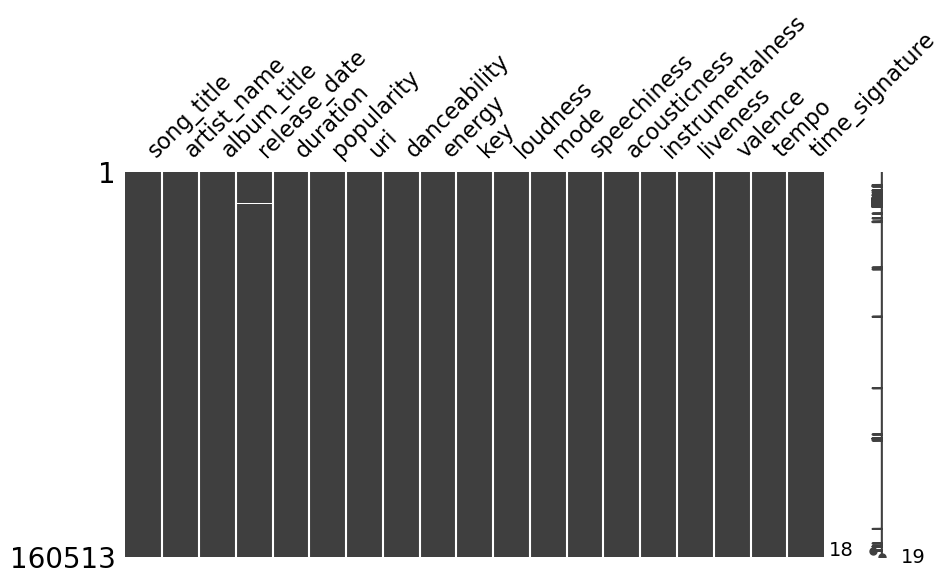

In [149]:
#  check if there are any null values
msno.matrix(spotify_df, figsize=(10,5))

Once again, we see that most of the features have no missing values.

The exception to this observation, of course, is the *release_date* column. We shall examine this column further.

In [150]:
#  display rows with missing release_date
missing_rows = spotify_df["release_date"].isnull()
spotify_df[missing_rows]

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
5443,In the Shadow of the Valley,,,None,187000,0,spotify:local:::In+the+Shadow+of+the+Valley:187,0.718,0.665,8,-10.369,1,0.1010,0.917000,0.000675,0.1100,0.751,79.725,4
5844,April Sweatpants,,,None,166000,0,spotify:local:::April+Sweatpants:166,0.563,0.663,1,-7.800,0,0.0337,0.043000,0.000000,0.1210,0.703,200.015,4
6002,Gee (Korean Ver. MP3 only),SNSD,,None,205000,0,spotify:local:SNSD::Gee+%28Korean+Ver.+MP3+onl...,0.467,0.495,2,-15.455,0,0.0516,0.161000,0.017100,0.0714,0.448,146.016,4
6003,Hero,,,None,194000,0,spotify:local:::Hero:194,0.576,0.579,6,-9.628,1,0.0769,0.160000,0.000000,0.0777,0.947,106.978,4
6008,Beneath the Mask [With Lyrics] - Persona 5,,,None,285000,0,spotify:local:::Beneath+the+Mask+%5BWith+Lyric...,0.663,0.735,8,-5.933,1,0.0275,0.000194,0.025500,0.0954,0.418,114.018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156239,Turning Japanese,The Vapors,The 80's Pop Culture Box - Disc 1,None,224000,0,spotify:local:The+Vapors:The+80%27s+Pop+Cultur...,0.524,0.559,5,-8.319,1,0.0298,0.185000,0.000059,0.1400,0.202,140.043,4
156240,Walk Like An Egyptian,Bangles,The 80's Pop Culture Box - Disc 7,None,204000,0,spotify:local:Bangles:The+80%27s+Pop+Culture+B...,0.716,0.828,11,-13.065,1,0.1040,0.011700,0.000002,0.3010,0.771,103.155,4
156245,In The Sun,Blondie,Summer & Sun,None,160000,0,spotify:local:Blondie:Summer+%26+Sun:In+The+Su...,0.796,0.970,1,-5.193,0,0.0371,0.007390,0.195000,0.6660,0.961,130.002,4
156258,Dear Prudence (Single),Siouxsie & the Banshees,The Best of Siouxsie and The Banshees,None,229000,0,spotify:local:Siouxsie+%26+the+Banshees:The+Be...,0.928,0.531,5,-6.520,0,0.1610,0.096900,0.314000,0.1600,0.765,109.963,4


So, apparently there are around **130** missing values in the release_date feature.

Moreover, filtering the entries with missing release dates reveal to us that most of these entries are actually local tracks. This means that these were not officialy uploaded to Spotify because it was only on the user's personal devices. And that's why there were no release dates specified for these entries; Spotify really had no information regarding when that track was uploaded. 

Given this information, it seems that the best way to deal with these entries is to **remove them altogether**.

### Checking for duplicated values

In [151]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
spotify_duplicated = spotify_df.duplicated(subset=["uri"])
spotify_duplicated_num = spotify_duplicated.sum()
spotify_total = spotify_df.shape[0]
spotify_duplicated_percent = (spotify_duplicated_num / spotify_total) * 100

#  display duplicated entries
display(spotify_df[spotify_duplicated])
print(f"{spotify_duplicated_percent: .2f}% ({spotify_duplicated_num} of {spotify_total}) of the spotify dataset are duplicated entries.")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1200,Have You Ever Seen The Rain,Creedence Clearwater Revival,Pendulum (Expanded Edition),1970-12-07,160133,84,spotify:track:2LawezPeJhN4AWuSB0GtAU,0.741,0.697,0,-7.028,1,0.0277,0.0664,0.000023,0.1330,0.774,116.109,4
1330,Payphone - Edit,Maroon 5,Overexposed (Deluxe),2012-01-01,231373,48,spotify:track:5cy3CNTBZbX8vZUIsu4p7K,0.741,0.783,4,-4.791,1,0.0415,0.0150,0.000000,0.3020,0.534,110.002,4
1380,She Will Be Loved - Radio Mix,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,259453,79,spotify:track:4llK75pXNWZz6KAho2Gp16,0.651,0.663,0,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,4
1544,Too Good At Goodbyes,Sam Smith,The Thrill Of It All (Special Edition),2017-11-03,201000,76,spotify:track:3VlbOrM6nYPprVvzBZllE5,0.681,0.372,5,-8.237,1,0.0432,0.6400,0.000000,0.1690,0.476,91.873,4
1651,Take Back Home Girl (Feat. Tori Kelly),Chris Lane,Take Back Home,2017-12-08,211426,0,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN,0.494,0.796,11,-3.968,1,0.0738,0.3810,0.000000,0.0918,0.646,159.926,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160487,Who'll Stop The Rain,Creedence Clearwater Revival,Chronicle: 20 Greatest Hits,1976-01-01,148333,49,spotify:track:4hqhLTbu0YtJVIdMs5ysPK,0.689,0.898,11,-4.704,1,0.0791,0.1890,0.766000,0.0770,0.626,90.970,4
160493,"The Downeaster ""Alexa""",Billy Joel,The Bridge/Storm Front/The Nylon Curtain(3 Pak),1982,223266,0,spotify:track:3BKN4JADczZGEul1wkTqUX,0.539,0.648,10,-8.265,0,0.0664,0.0148,0.000010,0.1070,0.676,167.997,4
160499,Here Comes the Rain Again - Remastered Version,Eurythmics,Boxed,2005-11-11,294586,42,spotify:track:5vYhr2kgOonJtWeJq5qZzU,0.669,0.389,0,-11.547,1,0.0306,0.6050,0.160000,0.0905,0.649,130.015,4
160505,Storm Coming,Gnarls Barkley,St. Elsewhere,2006-05-02,188160,31,spotify:track:0afDVuVu6iMIhU2zQ5lfPF,0.730,0.762,11,-5.383,1,0.3220,0.0169,0.074900,0.1970,0.744,79.069,4


 28.53% (45787 of 160513) of the spotify dataset are duplicated entries.


One of the hazards of our data collection process was that there was a high chance that we would accidentally extract the same tracks from different playlists.

Evidently, this was the case, since 28.53% of our data is comprised of duplicated tracks. 

Because these tracks will only confuse our model by doubling the effect of a specific track, we the opt to **remove these tracks entirely**.

### Unique values in the dataset

In [152]:
#  counting how many unique values each column has
for col in spotify_df.columns:
    unique_col_count = spotify_df[col].nunique()
    print(f"{col}: {unique_col_count} unique values")

song_title: 91342 unique values
artist_name: 35193 unique values
album_title: 69065 unique values
release_date: 9153 unique values
duration: 58187 unique values
popularity: 100 unique values
uri: 114726 unique values
danceability: 1291 unique values
energy: 2500 unique values
key: 12 unique values
loudness: 24649 unique values
mode: 2 unique values
speechiness: 1573 unique values
acousticness: 4720 unique values
instrumentalness: 5387 unique values
liveness: 1721 unique values
valence: 1979 unique values
tempo: 58498 unique values
time_signature: 5 unique values


This pretty much aligns with what we expect from data. 

What is important to note here are the three categorical variables/features with distinct categories/labels:
- key
- mode
- time signature

We will look into the unique values of each of these features.

In [153]:
#  identifying categorical values from each column that is identified as categorical
#  but do not have a huge amount of unique values; in other words, they act like labels
select_categorical = ["key",
                      "mode",
                      "time_signature"
                      ]

for categ_col in select_categorical:
    uniq_val = sorted(spotify_df[categ_col].unique())
    print(f"{categ_col} : {uniq_val}")

key : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
mode : [0, 1]
time_signature : [0, 1, 3, 4, 5]


Well their values are encoded as integers.

We provide its equivalent values in the tables below.

 **Equivalent categories**

 *Key*

| value | pitch class (key) |
|-----|-------------|
| 0 | C (also B♯, Ddouble flat) |
| 1 | C♯, D♭ (also Bdouble sharp) |
| 2 | D (also Cdouble sharp, Edouble flat) |
| 3 | D♯, E♭ (also Fdouble flat) |
| 4 | E (also Ddouble sharp, F♭) |
| 5 | F (also E♯, Gdouble flat) |
| 6 | F♯, G♭ (also Edouble sharp) |
| 7 | G (also Fdouble sharp, Adouble flat) |
| 8 | G♯, A♭ |
| 9 | A (also Gdouble sharp, Bdouble flat) |
| 10 | A♯, B♭ (also Cdouble flat) |
| 11 | B (also Adouble sharp, C♭) |


*Mode*

| value | mode |
|-------|------|
| 0 | minor |
| 1 | major |

*Time Signature*

| value | time signature |
|-------|----------------|
| 0 | 0/4 | 
| 1 | 1/4 |
| 3 | 3/4 |
| 4 | 4/4 |
| 5 | 5/4 |

We will now move on to cleaning our data.

## Data Cleaning & Feature Engineering

#### Convert release_date column to datetime

In [154]:
#  converting dtype of column to its proper dtype
spotify_clean_df = spotify_df.copy()
spotify_clean_df["release_date"] = pd.to_datetime(spotify_clean_df.loc[:, "release_date"], errors="coerce")

#  verify what dtype the column is
display(spotify_clean_df.dtypes)

#  check number of missing entries 
empty_dates = spotify_clean_df["release_date"].isnull().sum()
print(f"There are now {empty_dates} empty dates though. Previously, it was {missing_rows.sum()}.")

song_title                  object
artist_name                 object
album_title                 object
release_date        datetime64[ns]
duration                     int64
popularity                   int64
uri                         object
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object

There are now 255 empty dates though. Previously, it was 130.


After converting the release date column to datetime, the number of empty values the column has increased. There were 125 more null values that were added. This probably means that there are dates in the column that did not folow the dominant format, or it was missing some information which could manifest as it lacking specificity (i.e., no day nor month nor year).

The entries that now have missing release dates will be dropped all the same anyway in the succeeding steps. 

### Drop entries with null values

In [155]:
#  for reference 
total_before_dropN = spotify_clean_df.copy().shape

print(f"Current total entries before dropping null values: {total_before_dropN[0]}")

Current total entries before dropping null values: 160513


<AxesSubplot: >

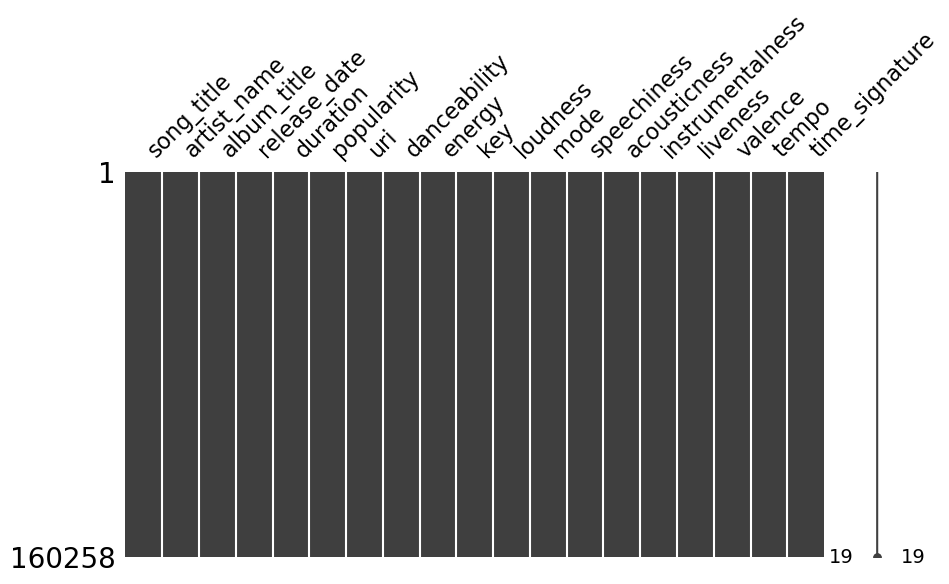

In [156]:
#  dropping rows with empty release dates
spotify_clean_df = spotify_clean_df.dropna(subset=["release_date"])

#  check if there are any null values
msno.matrix(spotify_clean_df, figsize=(10,5))

In [157]:
total_after_dropN = spotify_clean_df.shape
drop_countN = total_before_dropN[0] - total_after_dropN[0]

print(f"Current total entries: {total_after_dropN[0]} from {total_before_dropN[0]}")
print(f"Entries removed: {drop_countN}")

Current total entries: 160258 from 160513
Entries removed: 255


### Drop duplicated entries

In [158]:
#  for reference 
total_before_dropD = spotify_clean_df.copy().shape

print(f"Current total entries before dropping duplicate values: {total_before_dropD[0]}")

Current total entries before dropping duplicate values: 160258


In [159]:
#  dropping duplicate rows 
spotify_clean_df = spotify_clean_df.drop_duplicates(subset=["uri"])
spotify_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,222026,57,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.312,0.399,2,-8.506,1,0.0321,0.471000,0.583000,0.130,0.144,126.025,4
1,comedy,Sion,love,2022-07-23,213275,48,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.841,0.367,5,-7.085,1,0.0635,0.869000,0.003400,0.114,0.184,110.046,4
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,383066,44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.438,0.156,2,-17.311,1,0.0302,0.883000,0.268000,0.105,0.222,85.344,4
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,311100,34,spotify:track:3UG4sW8T05V7raSbLA67o8,0.622,0.730,1,-7.714,1,0.0368,0.018500,0.000426,0.105,0.538,117.036,4
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,181973,53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.417,0.123,6,-16.572,0,0.0377,0.993000,0.012500,0.143,0.180,137.444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160508,Raincoat,Crash Kings,Crash Kings,2009-01-01,237160,19,spotify:track:4cFfiJCmRfPd9H9p2s5AdT,0.616,0.828,11,-4.736,1,0.1330,0.005780,0.000000,0.352,0.576,123.986,4
160509,Such Sweet Thunder,Delfeayo Marsalis,Sweet Thunder: Duke & Shak,2011-01-18,363566,13,spotify:track:4diUG4YVYzfNL7a3cawE7N,0.689,0.701,8,-5.743,1,0.0667,0.025300,0.000000,0.154,0.463,131.988,4
160510,Rainy Days and Mondays,Pat Metheny,What's It All About,2011-06-14,432000,29,spotify:track:1Sv7zdEn0ez8ToEKsPiWWj,0.234,0.865,9,-5.131,1,0.0516,0.000036,0.000532,0.289,0.194,137.107,4
160511,Rain Drops Keep Falling On My Head (Re-Recorde...,B.J. Thomas,Guilty Pleasures (Re-Recorded / Remastered Ver...,2009-10-01,177028,0,spotify:track:1K3jYWWhRk5Gg8lVtEgbhK,0.733,0.899,0,-4.237,1,0.1430,0.004960,0.000047,0.372,0.760,127.086,4


In [160]:
total_after_dropD = spotify_clean_df.shape
drop_countD = total_before_dropD[0] - total_after_dropD[0]

print(f"Current total entries: {total_after_dropD[0]} from {total_before_dropD[0]}")
print(f"Entries removed: {drop_countD}")

Current total entries: 114506 from 160258
Entries removed: 45752


### Data validation

We are going to check if the entries in the dataset are all song tracks. 

To do this, we will try to manually comb over the albums and the artists first.

In [161]:
#  Checking if tracks extracted are actually songs rather than audiobook/podcasts
#  Manually checking aberant "albums" that will be removed from the dataset
spotify_clean_df.album_title.value_counts().sample(15).head(15)

Daytrip                                                1
Lluvia intensa y truenos                               2
Recap (with VanJess & Channel Tres)                    1
Chase Bryant                                           1
Hög standard                                           1
Fine                                                   2
Hung At Heart                                          1
sad4whattt (From "Euphoria" An HBO Original Series)    1
Best Of '99- '06                                       1
Always Alright                                         1
Diamonds In The Dirt                                   2
Collection 2                                           2
Black Star                                             1
Hoodie SZN                                             1
Country Roads                                          1
Name: album_title, dtype: int64

In [162]:
#  Manually checking aberant "artists" that will be removed from the dataset
spotify_clean_df.artist_name.value_counts().sample(15).head(15)

mr. okane                 1
Joseph Gatscyjk           1
Edward Maya               7
Amanda Shires             6
Overkill                  4
Firewatcher               1
Sholiha                   1
John Francis Wade         2
Timmy T                   1
Bo Ohm                    1
The Gregg Allman Band     5
Summer Walker            15
Gathering in Jazz         4
Twin Oaks                 1
John Gorka                1
Name: artist_name, dtype: int64

There seems to be a lot of albums that are specific to French tutorials. 

We focus our attention to these albums.

In [163]:
#  searching for albums that has the word french in their titles since this seems to be the most common deviant
spotify_clean_df[spotify_clean_df.album_title.str.contains("French")].album_title.value_counts().head()

Learn In Your Car: Verbs 101 French              86
English To French                                51
Learn in Your Car: French Level 1                45
Learn in Your Car: French Level 2                35
French-English Audio Dictionary For Beginners    31
Name: album_title, dtype: int64

These albums will be removed to make sure that most entries are music/song tracks.

In [164]:
#  for reference 
total_before_filter = spotify_clean_df.copy().shape

print(f"Current total entries before filtering out: {total_before_filter[0]}")

Current total entries before filtering out: 114506


We found other artists and albums that fall under audiobooks and spoken poetry in the dataset. We will remove these promptly. 

In [165]:
deviant_albums = ["Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "The Velveteen Rabbit",
                  "French-English Audio Dictionary For Beginners",
                  "Learn In Your Car: Verbs 101 French",
                  "English To French",
                  "Learn in Your Car: French Level 1",
                  "Learn in Your Car: French Level 2",
                  "French-English Audio Dictionary For Beginners",
                  "Learn in Your Car: French Level 3",
                  "Learn to Speak French: English-French Phrase and Word Audio Book",
                  "Learn French Words",
                  "VocabuLearn® Word Boosters French",
                  "Speak and Read French, Part 3: French Literature",
                  "Vocabulearn ® French - English Level 3",
                  "Vocabulearn ® French - English Level 2",
                  "Vocabulearn ® French - English Level 1",
                  "Speak and Read French, Vol. 2: Basic and Intermediate",
                  "Speak and Read French, Vol. 1: Basic",
                  "Learn French - Easily, Effectively, and Fluently",
                  "English to French - Useful Phrases",
                  "Learn French Fast",
                  "Learn French Self-Taught - Franz Thimm",
                  "Easy Conversations in French - Gustave Chouquet",
                  "An Interview with Kris Needs",
                  "Civil Rights vs. Social Privilege",
                  "More Ghost Stories by M. R. James",
                  "The Halloween Poetry Collection",
                  ]

deviant_artists = ["Orange",
                   "DBS Audiobooks",
                   "VANTAGE"
                   ]

#  removing the previously listed albums and artists
sans_devalbums = ~spotify_clean_df["album_title"].isin(deviant_albums)
sans_devartists = ~spotify_clean_df["artist_name"].isin(deviant_artists)
spotify_clean_df = spotify_clean_df[sans_devalbums & sans_devartists]
display(spotify_clean_df.sample(5))

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
31596,Memories,LJ MASE,Memories,2020-08-31,306933,39,spotify:track:3wNi79QD5Jkz9yWFSGEeBl,0.481,0.9950,1,-1.479,0,0.4140,0.00295,0.001440,0.4210,0.0608,150.042,4
14422,Where The Skies Are Blue,The Lumineers,Cleopatra (Deluxe),2016-02-05,140120,0,spotify:track:1w92STuiDmAHvFeOQFXBZF,0.414,0.3290,4,-8.193,1,0.0396,0.63800,0.000000,0.1140,0.4260,132.571,4
36227,Mountains,Hans Zimmer,Interstellar (Original Motion Picture Soundtra...,2014-11-18,219092,62,spotify:track:0Sg3UL7f40ulmTh0Xwr6qY,0.239,0.0434,1,-27.303,1,0.0382,0.99300,0.887000,0.0916,0.1470,70.113,3
97592,Water Flow,KLXX,Water,2020-07-24,200000,34,spotify:track:1KuuHDwv8BKKe911swYISj,0.409,0.0891,3,-21.985,1,0.0527,0.98200,0.877000,0.2460,0.1620,79.810,4
149309,Sentimental Southern Boy,Jack White,Best of Jack White,2014-04-20,252920,0,spotify:track:5lgWAlM2Q4oVqzPiPSjD7G,0.395,0.6480,9,-7.372,1,0.0270,0.04070,0.000083,0.0868,0.2460,80.286,4


In [166]:
total_after_filter = spotify_clean_df.shape
filter_count = total_before_filter[0] - total_after_filter[0]

print(f"Current total entries: {total_after_filter[0]} from {total_before_filter[0]}")
print(f"Entries removed: {filter_count}")

Current total entries: 113947 from 114506
Entries removed: 559


### Scaling specific features
 
 We will scale the values for the specifc audio features/qualities. 

In [167]:
to_scale = ["danceability",
            "energy",
            "loudness",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "liveness",
            "valence",
            "tempo",
            "popularity"
            ]

spotify_scaled_df = spotify_clean_df.copy()

scaler = MinMaxScaler()

spotify_scaled_df.loc[:, to_scale] = scaler.fit_transform(spotify_scaled_df.loc[:, to_scale])

spotify_scaled_df[to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,113947.0,0.569690,0.182480,0.0,0.454361,0.587221,0.701826,1.0
energy,113947.0,0.582909,0.266915,0.0,0.398000,0.628000,0.803000,1.0
loudness,113947.0,0.808377,0.103879,0.0,0.781792,0.839683,0.874490,1.0
speechiness,113947.0,0.081074,0.097327,0.0,0.036054,0.047211,0.078512,1.0
acousticness,113947.0,0.356834,0.347503,0.0,0.034337,0.226908,0.668675,1.0
instrumentalness,113947.0,0.166999,0.322784,0.0,0.000000,0.000086,0.063100,1.0
liveness,113947.0,0.202075,0.185729,0.0,0.096700,0.122000,0.242000,1.0
valence,113947.0,0.472034,0.261361,0.0,0.257257,0.464464,0.683684,1.0
tempo,113947.0,0.497800,0.123193,0.0,0.403511,0.499507,0.574790,1.0
popularity,113947.0,0.363136,0.222399,0.0,0.220000,0.400000,0.520000,1.0


### Converting duration from ms to min 

We will be converting the values in the duration feature from milliseconds to minutes so that we can easily comprehend the values.

In [168]:
spotify_clean_df = spotify_scaled_df.copy()

In [169]:
spotify_clean_df.loc[:, 'duration'] = spotify_scaled_df.loc[:, 'duration'] / 60000
spotify_clean_df.duration.describe()

count    113947.000000
mean          3.863394
std           3.092581
min           0.024433
25%           2.937500
50%           3.524217
75%           4.221975
max         260.900000
Name: duration, dtype: float64

From here we can easily understand how long songs are since these are units that we often work with.

### Get specific year when track was released (release_year)

In [170]:
spotify_clean_df.loc[:, "release_year"] = spotify_clean_df.loc[:, "release_date"].dt.year

spotify_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,3.700433,0.57,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.316430,0.399,2,0.824630,1,0.033161,0.472892,0.583000,0.130,0.144144,0.524695,4,2022
1,comedy,Sion,love,2022-07-23,3.554583,0.48,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.852941,0.367,5,0.847386,1,0.065599,0.872490,0.003400,0.114,0.184184,0.458168,4,2022
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,6.384433,0.44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.444219,0.156,2,0.683626,1,0.031198,0.886546,0.268000,0.105,0.222222,0.355323,4,2009
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,5.185000,0.34,spotify:track:3UG4sW8T05V7raSbLA67o8,0.630832,0.730,1,0.837313,1,0.038017,0.018574,0.000426,0.105,0.538539,0.487270,4,2021
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,3.032883,0.53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.422921,0.123,6,0.695460,0,0.038946,0.996988,0.012500,0.143,0.180180,0.572237,3,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160508,Raincoat,Crash Kings,Crash Kings,2009-01-01,3.952667,0.19,spotify:track:4cFfiJCmRfPd9H9p2s5AdT,0.624746,0.828,11,0.885003,1,0.137397,0.005803,0.000000,0.352,0.576577,0.516206,4,2009
160509,Such Sweet Thunder,Delfeayo Marsalis,Sweet Thunder: Duke & Shak,2011-01-18,6.059433,0.13,spotify:track:4diUG4YVYzfNL7a3cawE7N,0.698783,0.701,8,0.868877,1,0.068905,0.025402,0.000000,0.154,0.463463,0.549522,4,2011
160510,Rainy Days and Mondays,Pat Metheny,What's It All About,2011-06-14,7.200000,0.29,spotify:track:1Sv7zdEn0ez8ToEKsPiWWj,0.237323,0.865,9,0.878677,1,0.053306,0.000036,0.000532,0.289,0.194194,0.570834,4,2011
160511,Rain Drops Keep Falling On My Head (Re-Recorde...,B.J. Thomas,Guilty Pleasures (Re-Recorded / Remastered Ver...,2009-10-01,2.950467,0.00,spotify:track:1K3jYWWhRk5Gg8lVtEgbhK,0.743408,0.899,0,0.892994,1,0.147727,0.004980,0.000047,0.372,0.760761,0.529113,4,2009


***

## Exploratory Data Analysis 

#### Summary Statistics

In [171]:
# Summary Statistics
spotify_clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,113947.0,3.863394,3.092581,0.024433,2.937500,3.524217,4.221975,260.9
popularity,113947.0,0.363136,0.222399,0.000000,0.220000,0.400000,0.520000,1.0
danceability,113947.0,0.569690,0.182480,0.000000,0.454361,0.587221,0.701826,1.0
energy,113947.0,0.582909,0.266915,0.000000,0.398000,0.628000,0.803000,1.0
key,113947.0,5.217926,3.567738,0.000000,2.000000,5.000000,8.000000,11.0
loudness,113947.0,0.808377,0.103879,0.000000,0.781792,0.839683,0.874490,1.0
mode,113947.0,0.664581,0.472139,0.000000,0.000000,1.000000,1.000000,1.0
speechiness,113947.0,0.081074,0.097327,0.000000,0.036054,0.047211,0.078512,1.0
acousticness,113947.0,0.356834,0.347503,0.000000,0.034337,0.226908,0.668675,1.0
instrumentalness,113947.0,0.166999,0.322784,0.000000,0.000000,0.000086,0.063100,1.0


In [172]:
# Aggregate numeric values by year
spotify_year_df = spotify_clean_df.groupby(['release_year']).agg({'song_title': 'count', 
                                                          'duration': ['mean', 'min', 'max', 'std'],
                                                         'danceability': ['mean', 'min', 'max', 'std'],
                                                         'energy': ['mean', 'min', 'max', 'std'],
                                                         'loudness': ['mean', 'min', 'max', 'std'],
                                                         'speechiness': ['mean', 'min', 'max', 'std'],
                                                         'acousticness': ['mean', 'min', 'max', 'std'],
                                                         'instrumentalness': ['mean', 'min', 'max', 'std'],
                                                         'liveness': ['mean', 'min', 'max', 'std'],
                                                         'valence': ['mean', 'min', 'max', 'std'],
                                                         'tempo': ['mean', 'min', 'max', 'std'],
                                                         'key': ['mean', 'min', 'max', 'std'],
                                                         'mode': ['mean', 'min', 'max', 'std'],
                                                         'time_signature': ['mean', 'min', 'max', 'std'],})
spotify_year_df['duration'].tail(10)

,mean,min,max,std
release_year,,,,
2013,4.412410,0.243367,73.423550,4.722735
2014,4.749149,0.298283,100.011017,7.071632
2015,3.852927,0.153650,181.833450,3.241382
2016,4.249467,0.091317,260.900000,8.102442
2017,3.704109,0.168783,20.839333,1.284704
2018,3.631076,0.489767,23.096667,1.150308
2019,3.586044,0.290000,29.783833,1.407152
2020,3.553884,0.606983,21.608600,1.225583
2021,3.354478,0.618067,22.400000,1.163979


In [173]:
# Get artist count of the dataset
len(spotify_clean_df.groupby(['artist_name']).count())

35166

#### 1.) What year did we collect the most songs?



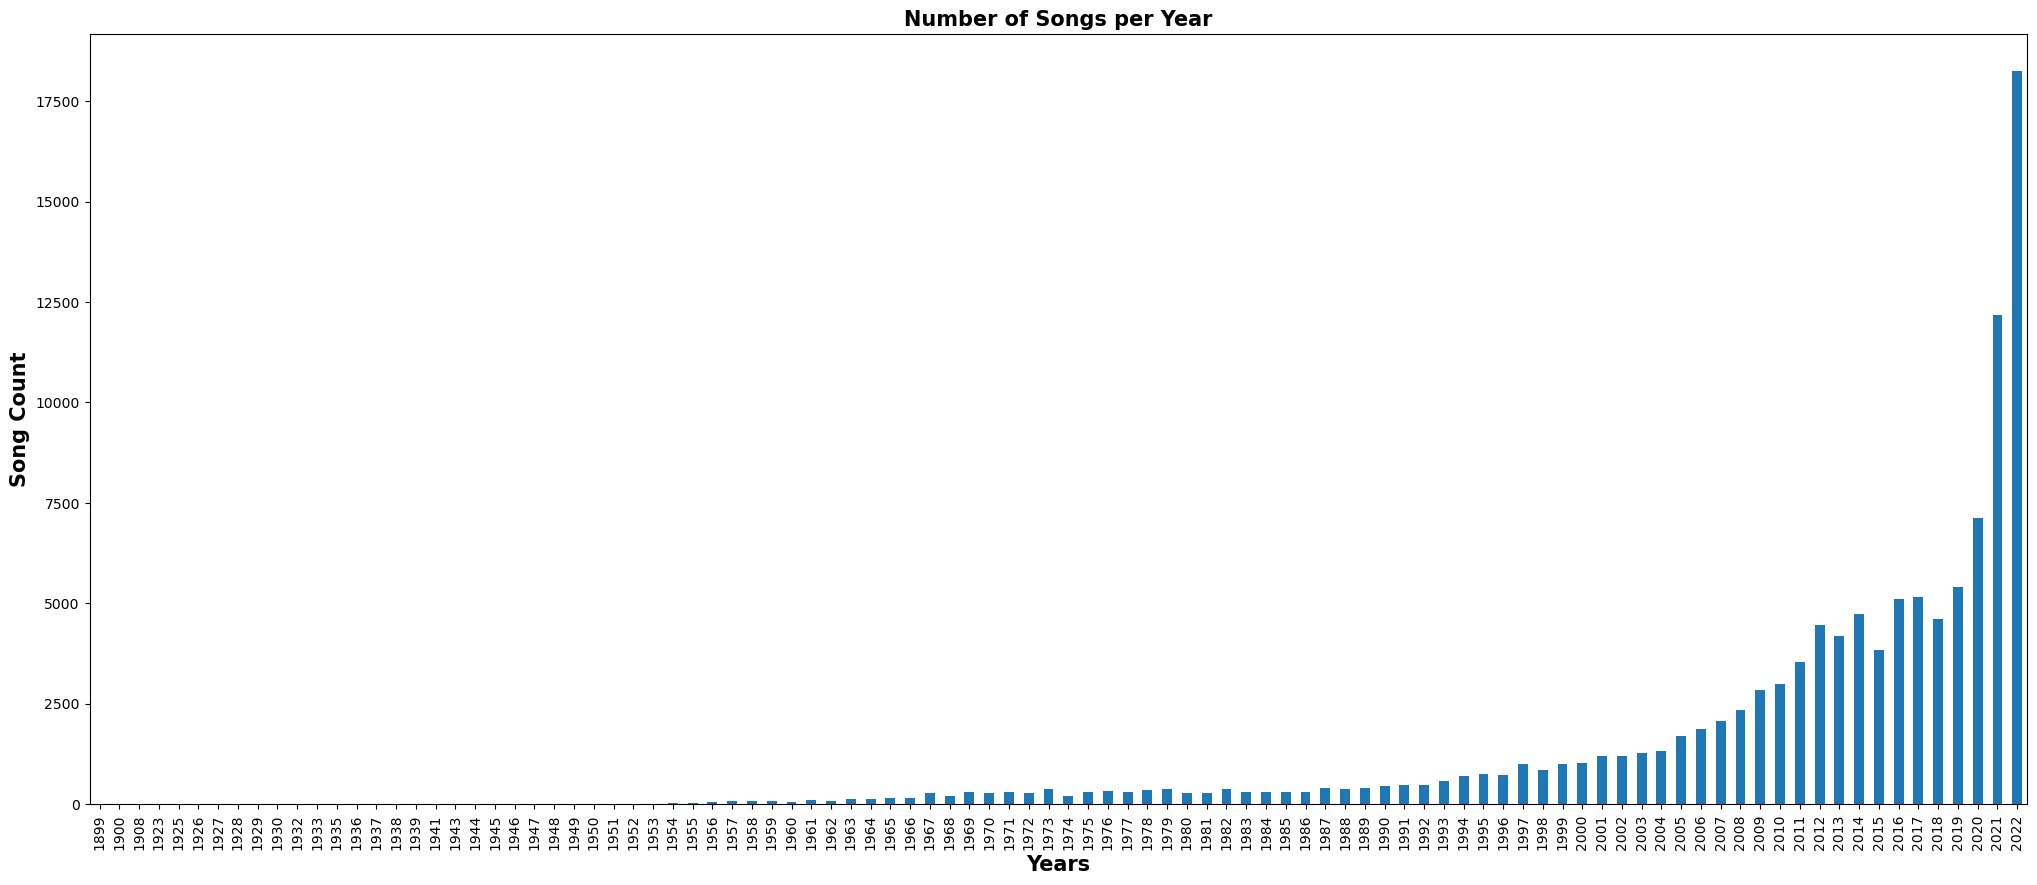

In [174]:
# Number of songs per year
spotify_year_df['song_title']['count'].plot(kind='bar', figsize=(25,10))
plt.title('Number of Songs per Year', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Years', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song Count', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

The bargraph entitled, *Number of Songs per Year* shows that the year 2022 contains the most songs that was collected from the dataset. This is valued to over 17,500 songs from the aforementioned year alone. Following this are the years: 2021 and 2022 with 12,500 and 7,500 songs respectively. On the other hand, the years 1953 and below shows no song at all.



#### 2.) How long are most songs?

In [175]:
#average duration of songs
spotify_clean_df.duration.mean()

3.8633938211039633

The data shows that the mean for the average duration of the songs is valued at 3.863. This means that the majority of the songs is 3.863 minutes long.

#### 3.) What are the average factors of the variables in the dataset?

In [176]:
relevant_qualities = ["danceability",
                      "energy",
                      "loudness",
                      "acousticness",
                      "instrumentalness",
                      "liveness",
                      "valence",
                      "tempo",
                      "popularity"
                      ]

In [177]:
ave_song_qualities = spotify_clean_df[relevant_qualities].mean()

In [178]:
#  kindly visualize this with a line_polar using plotly express
fig = px.line_polar(ave_song_qualities, 
                    r=ave_song_qualities,
                    theta=relevant_qualities,
                    line_close=True,
                    title="Average Factors of All Songs")
fig.show()

a:\programming-tools\Anaconda\envs\data102\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



From the dataset retrieved, the list above represents the average values of the factors being utilized in this research. It is to be noted that the factor *key* contains the highest average with the value of 5.217926, while the factor *instrumentalness* contains the lowest average with the value 0.166999.

#### 4.)  Who are the most popular artists?

In [179]:
popular_songs = spotify_clean_df[spotify_clean_df.popularity.ge(.7)].sort_values(by="popularity", ascending=False)

popular_songs

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
21104,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,3.315617,1.00,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,0.405680,0.6470,2,0.844279,1,0.034814,0.176707,0.000058,0.110,0.274274,0.350061,4,2022
21085,I'm Good (Blue),David Guetta,I'm Good (Blue),2022-08-26,2.920633,0.98,spotify:track:4uUG5RXrOk84mYEfFvj3cK,0.597363,0.8290,8,0.883001,0,0.034298,0.019679,0.000000,0.128,0.563564,0.507929,4,2022
21118,Me Porto Bonito,Bad Bunny,Un Verano Sin Ti,2022-05-06,2.976117,0.98,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,0.635903,0.8580,11,0.915622,0,0.398760,0.264056,0.000000,0.210,0.342342,0.385212,4,2022
21097,La Bachata,Manuel Turizo,La Bachata,2022-05-26,2.710617,0.98,spotify:track:5ww2BF9slyYgNOk37BlC4u,0.623732,0.7820,11,0.906622,1,0.034194,0.017369,0.000000,0.189,0.562563,0.403727,4,2022
21092,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,2022-05-06,4.061933,0.98,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,0.636917,0.6320,9,0.865850,1,0.033574,0.258032,0.000000,0.288,0.559560,0.573944,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53368,YES or YES,TWICE,YES or YES,2018-11-05,3.961333,0.70,spotify:track:26OVhEqFDQH0Ij77QtmGP9,0.633874,0.9030,4,0.920506,1,0.061364,0.006024,0.000000,0.235,0.825826,0.607735,4,2018
13410,One For The Road,Arctic Monkeys,AM,2013-09-09,3.434183,0.70,spotify:track:6wNUBZNWFxdUGof6vkaykE,0.788032,0.3750,1,0.813292,1,0.524793,0.392570,0.000000,0.179,0.871872,0.251646,5,2013
101785,Almost Is Never Enough,Ariana Grande,Yours Truly,2013-01-01,5.462883,0.70,spotify:track:442j8VxaB60dWf9cBFuX5w,0.305274,0.0521,3,0.533958,1,0.039773,0.996988,0.944000,0.171,0.059259,0.762302,4,2013
101787,When You're Gone,Avril Lavigne,The Best Damn Thing (Expanded Edition),2007-04-17,4.008217,0.70,spotify:track:54JKnDB3CzVu8wNAOM27BI,0.389452,0.0178,5,0.426023,0,0.032438,0.997992,0.939000,0.114,0.164164,0.255988,4,2007


In [180]:
top_artists = popular_songs.groupby(by="artist_name")["popularity"].count().sort_values(ascending=False).head(15)

top_artists

artist_name
Drake             64
Taylor Swift      60
The Weeknd        46
Ed Sheeran        34
Rihanna           33
Harry Styles      32
Kanye West        31
Justin Bieber     30
Katy Perry        30
Kendrick Lamar    29
Beyoncé           28
Billie Eilish     28
Coldplay          25
Bruno Mars        25
Ariana Grande     24
Name: popularity, dtype: int64

The table found in this section displays the values of the factors of a song together with its artist. According to the data being shown, Drake and Taylor Swift are considered the top artist with a score of 64 and 60 respectively.

#### 5.) What are the avergage factors of the songs from most of the popular artists?

In [181]:
popartist_song_qualities = popular_songs.loc[popular_songs.artist_name.isin(top_artists.index)]
popartist_song_qualities = popartist_song_qualities.groupby(by="artist_name")[relevant_qualities].mean()
popartist_song_qualities

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,popularity
artist_name,,,,,,,,,
Ariana Grande,0.581389,0.534587,0.835825,0.309986,0.040550,0.196175,0.395988,0.528434,0.765833
Beyoncé,0.591423,0.659543,0.839553,0.191320,0.039686,0.196750,0.552663,0.492693,0.768929
Billie Eilish,0.615474,0.558925,0.816857,0.360799,0.078816,0.218989,0.462230,0.500201,0.795000
Bruno Mars,0.724990,0.643320,0.861679,0.161588,0.000526,0.143588,0.537369,0.519465,0.776800
Coldplay,0.549087,0.641400,0.831518,0.217836,0.057024,0.179148,0.400200,0.493907,0.785600
Drake,0.678673,0.676077,0.859918,0.150761,0.017902,0.211588,0.524975,0.511676,0.757812
Ed Sheeran,0.609504,0.546965,0.832304,0.403683,0.056678,0.158097,0.452246,0.453873,0.771765
Harry Styles,0.548301,0.562947,0.842960,0.369345,0.022037,0.173500,0.465744,0.497109,0.806875
Justin Bieber,0.571231,0.741067,0.869006,0.165950,0.060374,0.247270,0.481592,0.509944,0.757333


In [182]:
#  kindly visualize this with a line_polar using plotly express
fig = go.Figure()

for i in range(len(popartist_song_qualities)):
    fig.add_trace(go.Scatterpolar(
            r = popartist_song_qualities.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = popartist_song_qualities.index[i],
        ))
    
fig.update_layout(
    title = 'Average Factors of Popular Artists',
    showlegend = True
)

fig.show()

The top 5 artists are Ariana Grande, Beyonce, Billie Eilish, Bruno Mars and Coldplay. They all exhibit high loudness, energy, and danceability,  moderate acousticness. tempo and valence, and low liveness and instrumentalness. 

The graph shows that The Weekend shows a very strong Valence with a value of 0.5911564, while Ariane Grande shows the lowest value of 0.3959877.

For the Liveliness, shows a weak relationship with the highest value of 0.24727 from Justin Bieber while Bruno Mars has the least with 0.143588.

There is a commonality with the instrumentalness with a weak relationship with the highest value from Kanye West (0.189013), while Bruno Mars contains the least.

While for the Acousticness, it shows a weak relationship with a highest value from Ed Sheeran (0.4036833) and Drake having 0.1507615.

The loudness contains the strongest relationship among the rest of the factors, with the value of 0.8616786 from Bruno Mars while Billie Eilish contains the least value of 0.8168565.

There is a commonality with the factors: Energy and Dance showing a similar level.


#### 6.) What are the average factors of most of the popular songs?

In [183]:
popsong_qualities = popular_songs.loc[:, relevant_qualities].mean()
popsong_qualities

danceability        0.603840
energy              0.628136
loudness            0.832675
acousticness        0.271881
instrumentalness    0.103295
liveness            0.179247
valence             0.500327
tempo               0.502832
popularity          0.754702
dtype: float64

In [184]:
#  kindly visualize this with a line_polar using plotly express
fig = px.line_polar(popsong_qualities, 
                    r=popsong_qualities,
                    theta=relevant_qualities,
                    line_close=True,
                    title="Average Factors of Most Popular Songs")
fig.show()

a:\programming-tools\Anaconda\envs\data102\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The top 5 artists are Ariana Grande, Beyonce, Billie Eilish, Bruno Mars and Coldplay. They all exhibit high loudness, energy, and danceability,  moderate acousticness. tempo and valence, and low liveness and instrumentalness.  

The visualization shows that loudness contains the strongest relationsip valuing with 0.8326745 while instrumentalness has the weakest with a value of 0.1032948.


#### 7.) What are the average values of each factors of the songs per year?

In [185]:
annual_song_qualities = spotify_clean_df.groupby(by="release_year")[relevant_qualities].mean()
annual_song_qualities = annual_song_qualities.sort_index(ascending=False)
annual_song_qualities

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,popularity
release_year,,,,,,,,,
2022,0.581638,0.553287,0.797472,0.392031,0.246269,0.191121,0.447234,0.496286,0.466590
2021,0.559602,0.561544,0.790209,0.387484,0.216004,0.203426,0.444029,0.492480,0.466227
2020,0.575172,0.572565,0.805880,0.382152,0.170982,0.211889,0.470373,0.499274,0.440133
2019,0.576108,0.579431,0.807073,0.383126,0.163453,0.219053,0.474809,0.497075,0.436064
2018,0.589170,0.587001,0.818500,0.350627,0.141374,0.202426,0.480653,0.498493,0.417349
...,...,...,...,...,...,...,...,...,...
1925,0.358012,0.201000,0.758219,0.891566,0.000002,0.125000,0.337337,0.290128,0.000000
1923,0.399594,0.174150,0.749299,0.855422,0.002306,0.094050,0.090190,0.515436,0.190000
1908,0.547160,0.496500,0.829530,0.362952,0.004399,0.107000,0.519520,0.304101,0.390000


In [186]:
five_year_intervals = [2022,
                       2017,
                       2012,
                       2007,
                       2002,
                       1997,
                       1992,
                       1987,
                       1982,
                       1977]


five_year_qualities = annual_song_qualities.loc[five_year_intervals]

In [187]:
#  kindly visualize this with a line_polar using plotly express
fig = go.Figure()

for i, entry in enumerate(five_year_qualities):
    fig.add_trace(go.Scatterpolar(
            r = five_year_qualities.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = five_year_qualities.index[i].astype(str),
        ))
    
    
fig.update_layout(
    title = 'Average Factors of Popular Artists',
    showlegend = True
)

fig.show()

The table in this section displays the average values of the factors over the years. The years covered in the data is from 1899 to 2022. For the latest year (2022), the following are the average values of the factors: Danceability, Energy, Loudness, Acousticness, Instrumentalness, Liveness, Valence, and Tempo in a respective manner: 0.581638, 0.553287, 0.797472, 0.392031, 0.246269, 0.191121, 0.447234 and 0.496286.

The radial chart also shows the average values of the factors from 1987 to 2022 with a five-year interval. This pretty much shows that songs have generally been consistent through the years. 

#### 8.) What factors are correlate with one another?

recall the criteria for the strength of correlations

| Absolute Value of Coefficient Correlation | Strength of Linear Relationship |
|-------------------------------------------|---------------------------------|
|0-0.2|Very Weak|
|0.2-0.4|Weak|
|0.4-0.6|Moderate|
|0.6-0.8|Strong|
|0.8-1.0|Very Strong|

C:\Users\Admin\AppData\Local\Temp\ipykernel_10856\2596031898.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10856\2596031898.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Admin\AppData\Local\Temp\ipykernel_10856\2596031898.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

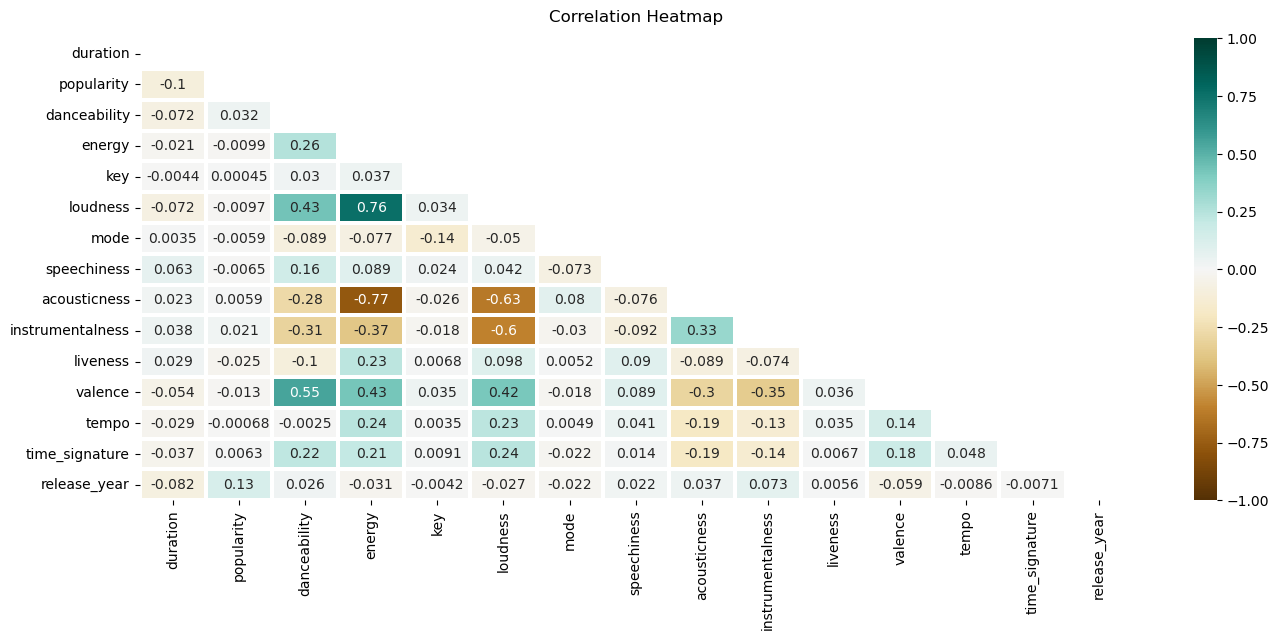

In [188]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(spotify_clean_df.corr(), dtype=np.bool))
heatmap=sns.heatmap(spotify_clean_df.corr(),mask=mask, vmin=-1,vmax=1,annot=True, cmap='BrBG', linewidths=1.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

[Text(0.5, 1.0, 'Instrumentalness vs Loudness Correlation')]

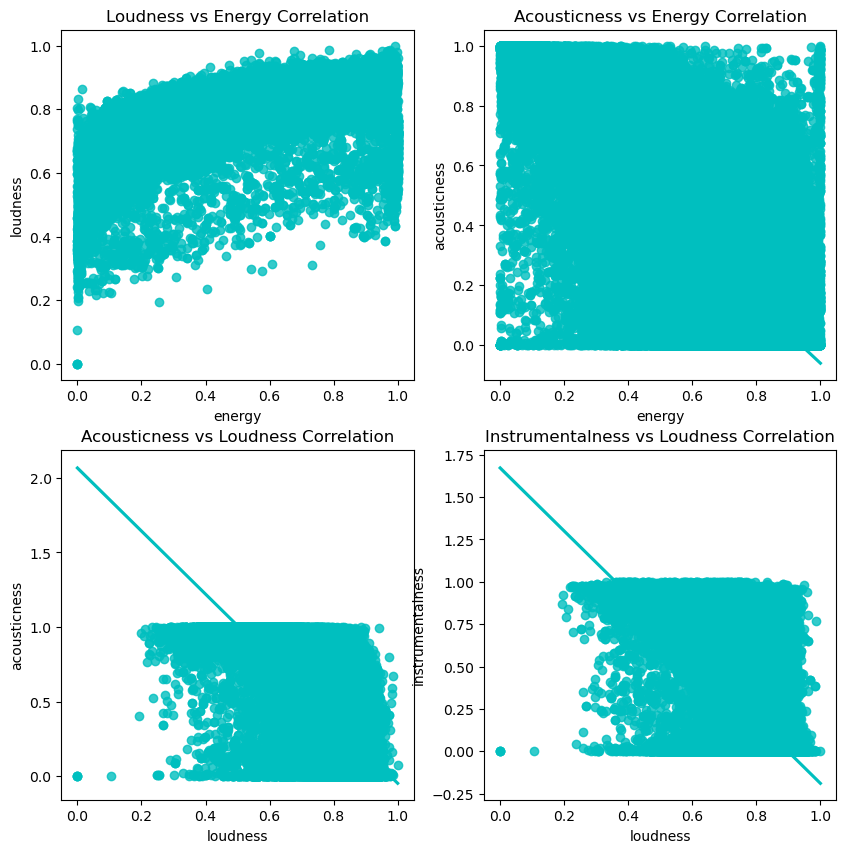

In [189]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.regplot(data=spotify_clean_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")

plt.subplot(2,2,2)
sns.regplot(data=spotify_clean_df, y="acousticness", x="energy", color="c").set(title="Acousticness vs Energy Correlation")

plt.subplot(2,2,3)
sns.regplot(data=spotify_clean_df, y="acousticness", x="loudness", color="c").set(title="Acousticness vs Loudness Correlation")

plt.subplot(2,2,4)
sns.regplot(data=spotify_clean_df, y="instrumentalness", x="loudness", color="c").set(title="Instrumentalness vs Loudness Correlation")

since the visualization shows too much data, we opt to get a sample data to show a better visualization

In [190]:
# get a sample dataframe
sample_df = spotify_clean_df.sample(int(0.004*len(spotify_clean_df)))   

print(len(sample_df))

455


[Text(0.5, 1.0, 'Instrumentalness vs Loudness Correlation')]

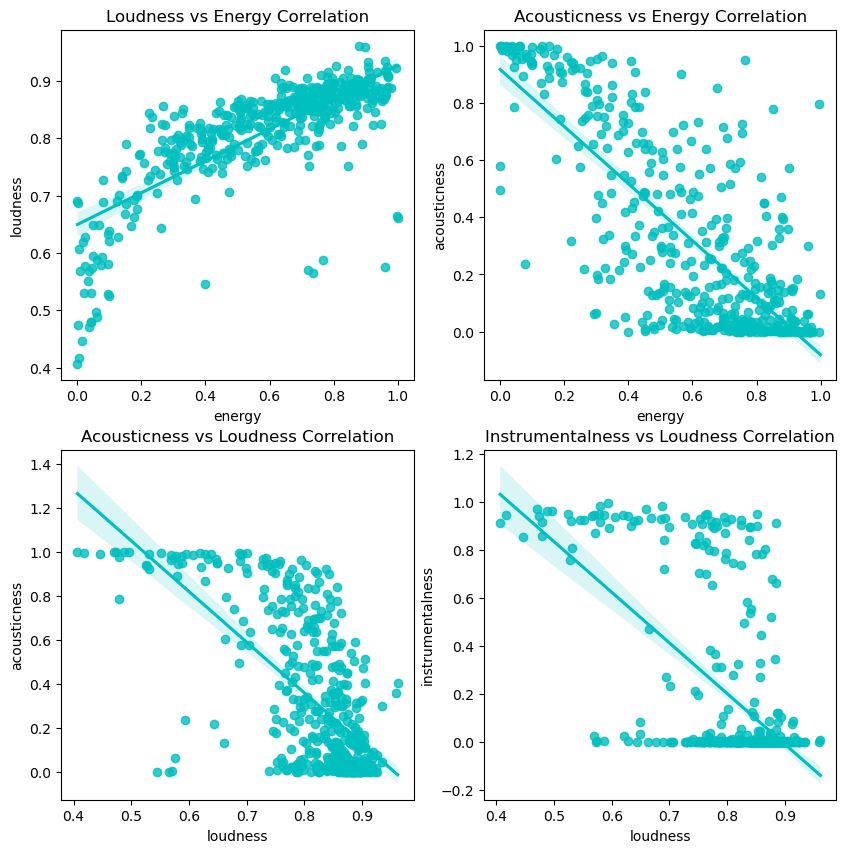

In [191]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.regplot(data=sample_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")

plt.subplot(2,2,2)
sns.regplot(data=sample_df, y="acousticness", x="energy", color="c").set(title="Acousticness vs Energy Correlation")

plt.subplot(2,2,3)
sns.regplot(data=sample_df, y="acousticness", x="loudness", color="c").set(title="Acousticness vs Loudness Correlation")

plt.subplot(2,2,4)
sns.regplot(data=sample_df, y="instrumentalness", x="loudness", color="c").set(title="Instrumentalness vs Loudness Correlation")

With the available dataset, the researchers conducted a heatmap to analyze the factors and its correlation with each other. The following factors are analyzed: *(1) Duration, (2) Loudness, (3) Valence, (4) Tempo, (5) Energy, (6) Acousticness and (7) Danceability*. The results of the data shows that *Loudness* and *Energy*; *Acousticness* and *Energy*; *Acousticness* and *Loudness*; and *Instrumental* and *Loudness* shows a **strong to very strong correlation** to each other.

### Additional analyses

In [192]:
# Create a top 100 songs dataframe (based on popularity)
spotify_top100_df = spotify_clean_df.sort_values(by=['popularity'], ascending=False).head(100)
spotify_clean_df.sort_values(by=['popularity'], ascending=False).iloc[100] # After top 100 > Song number 101

song_title                                      Believer
artist_name                              Imagine Dragons
album_title                                       Evolve
release_date                         2017-06-23 00:00:00
duration                                        3.405767
popularity                                          0.88
uri                 spotify:track:0pqnGHJpmpxLKifKRmU6WP
danceability                                    0.470588
energy                                             0.795
key                                                    1
loudness                                        0.812443
mode                                                   1
speechiness                                     0.095661
acousticness                                    0.049498
instrumentalness                                 0.00244
liveness                                           0.399
valence                                         0.612613
tempo                          

In [193]:
# Create separate dataframe for remaining songs in the dataset
a = spotify_clean_df.sort_values(by=['popularity'], ascending=False)
b = spotify_top100_df #Top 100 songs

In [194]:
# Df for the rest of the dataset
spotify_out100_df = pd.merge(a,b, indicator=True, how='outer')
spotify_out100_df.head()

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,_merge
0,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,3.315617,1.00,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,0.405680,0.647,2,...,1,0.034814,0.176707,0.000058,0.110,0.274274,0.350061,4,2022,both
1,Me Porto Bonito,Bad Bunny,Un Verano Sin Ti,2022-05-06,2.976117,0.98,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,0.635903,0.858,11,...,0,0.398760,0.264056,0.000000,0.210,0.342342,0.385212,4,2022,both
2,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,2022-05-06,4.061933,0.98,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,0.636917,0.632,9,...,1,0.033574,0.258032,0.000000,0.288,0.559560,0.573944,4,2022,both
3,I'm Good (Blue),David Guetta,I'm Good (Blue),2022-08-26,2.920633,0.98,spotify:track:4uUG5RXrOk84mYEfFvj3cK,0.597363,0.829,8,...,0,0.034298,0.019679,0.000000,0.128,0.563564,0.507929,4,2022,both
4,La Bachata,Manuel Turizo,La Bachata,2022-05-26,2.710617,0.98,spotify:track:5ww2BF9slyYgNOk37BlC4u,0.623732,0.782,11,...,1,0.034194,0.017369,0.000000,0.189,0.562563,0.403727,4,2022,both


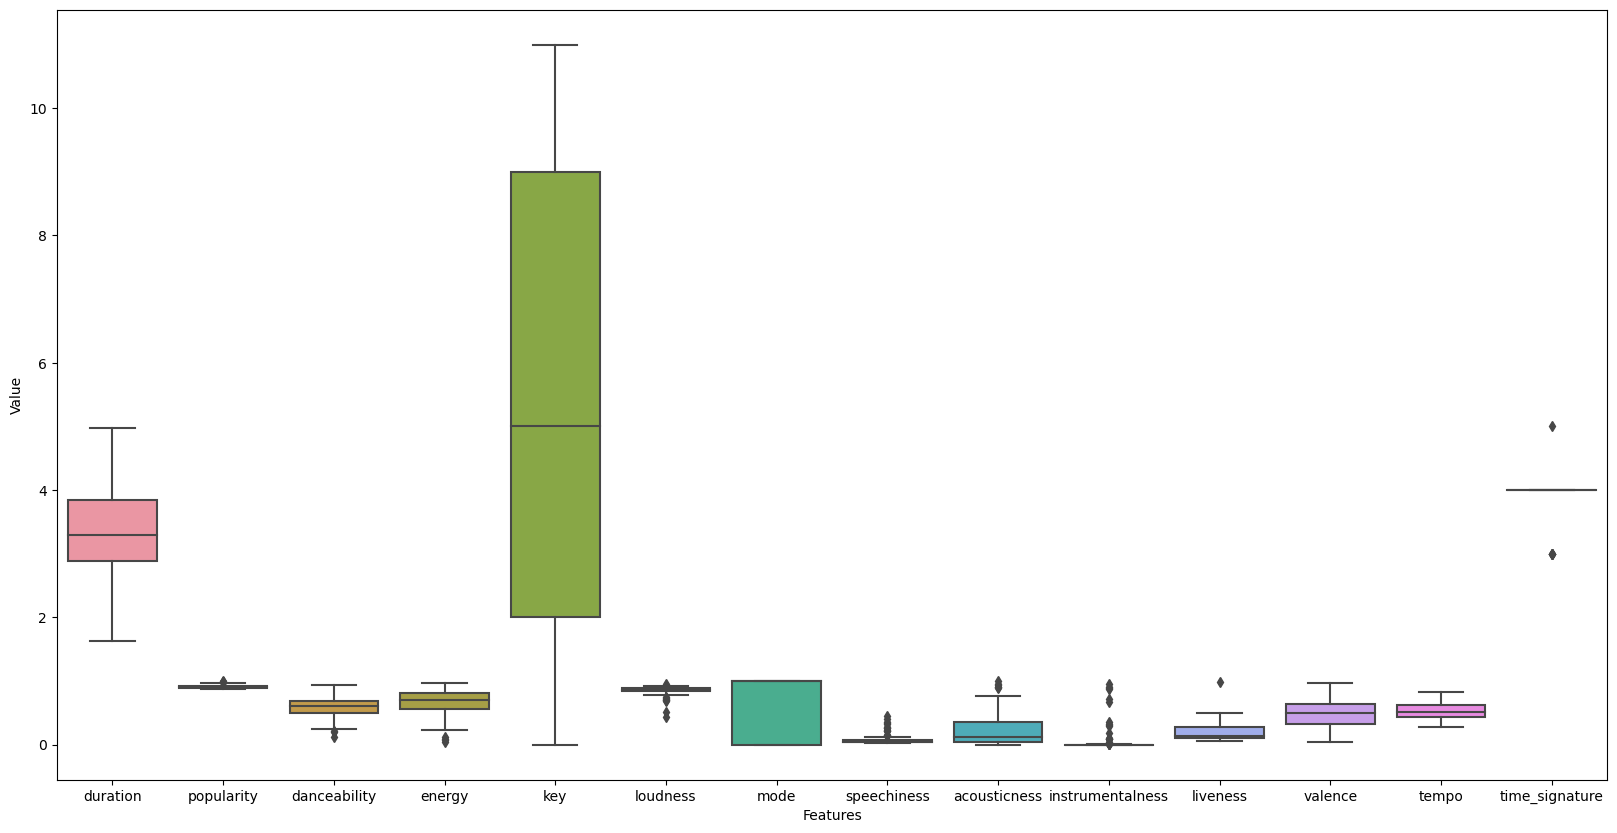

In [195]:
# Compare each audio feature of the top 100 songs with the rest of the dataset (box plots)
plt.figure(figsize=(20,10))
sns.boxplot(data=spotify_top100_df.drop(['song_title','artist_name','release_date','uri','release_year'],axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

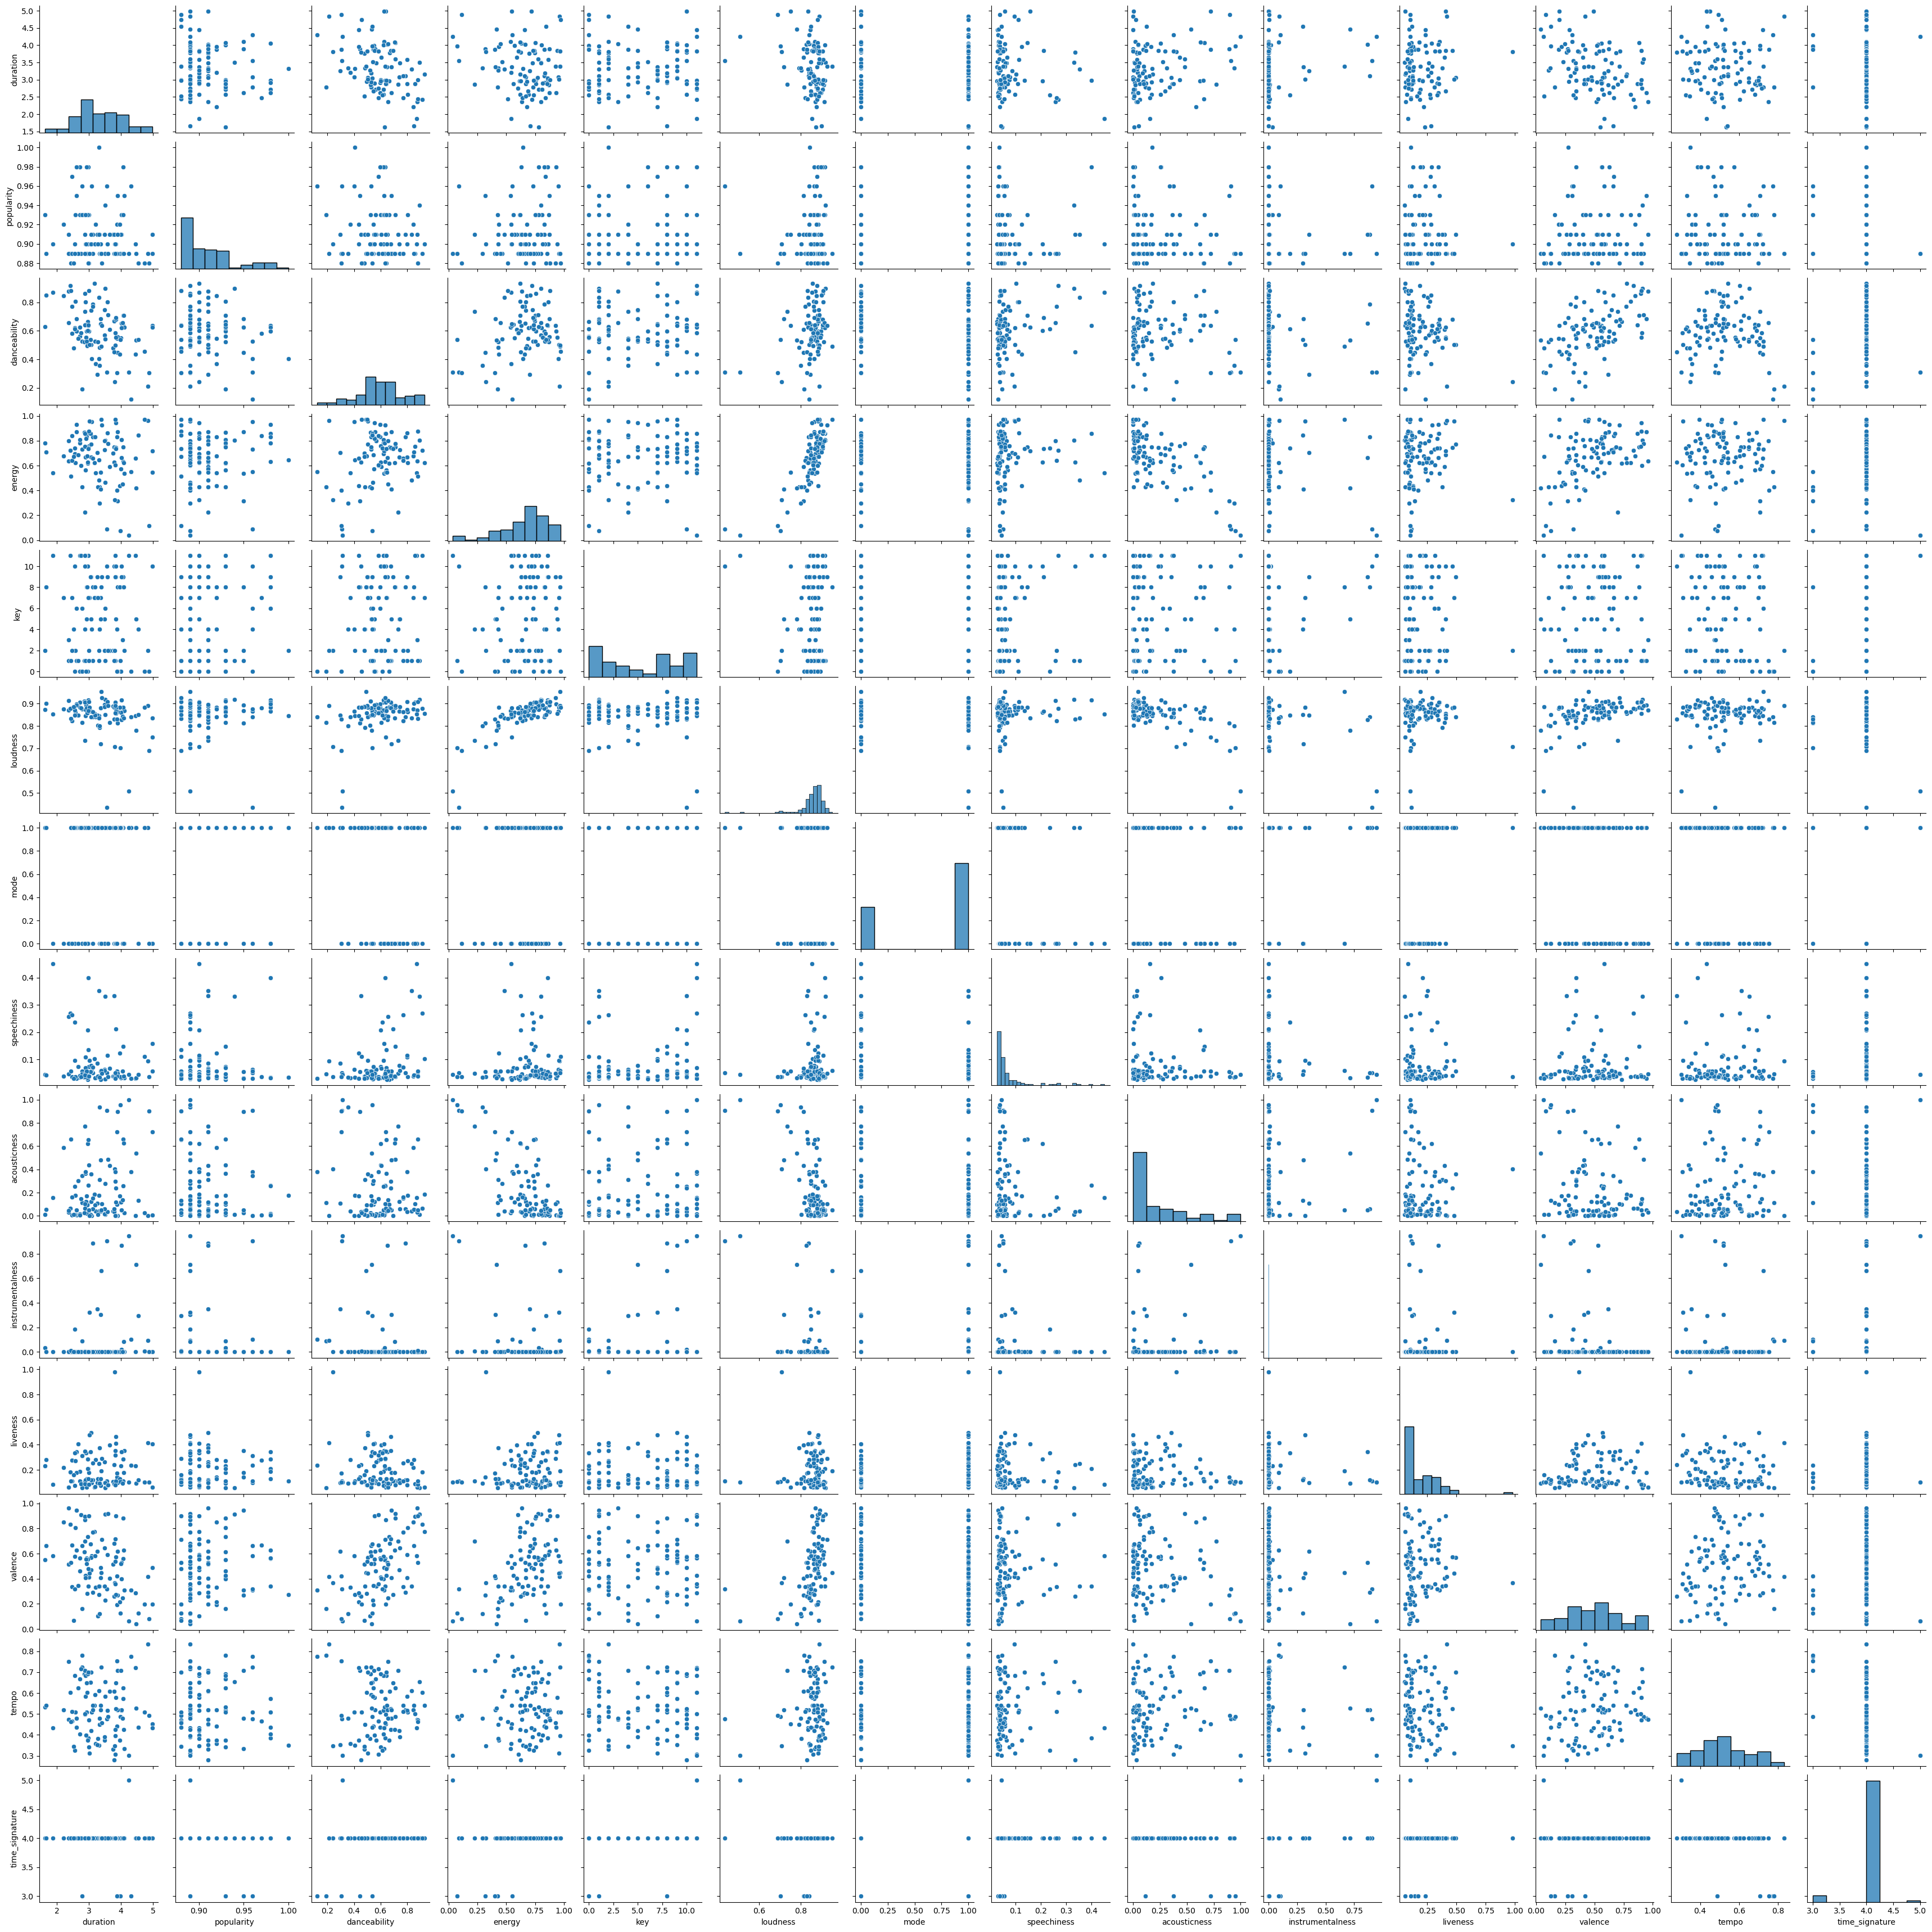

In [196]:
#Pairplot
sns.pairplot(data=spotify_top100_df.drop(['song_title','artist_name','release_date','uri','release_year'],axis=1))
plt.show()

not normal 

consolidated distributions and attributes are shown in the pairplot showing that there is no normally distributed variable

This does not affect analyses because there is no assumption required to fullfill normality

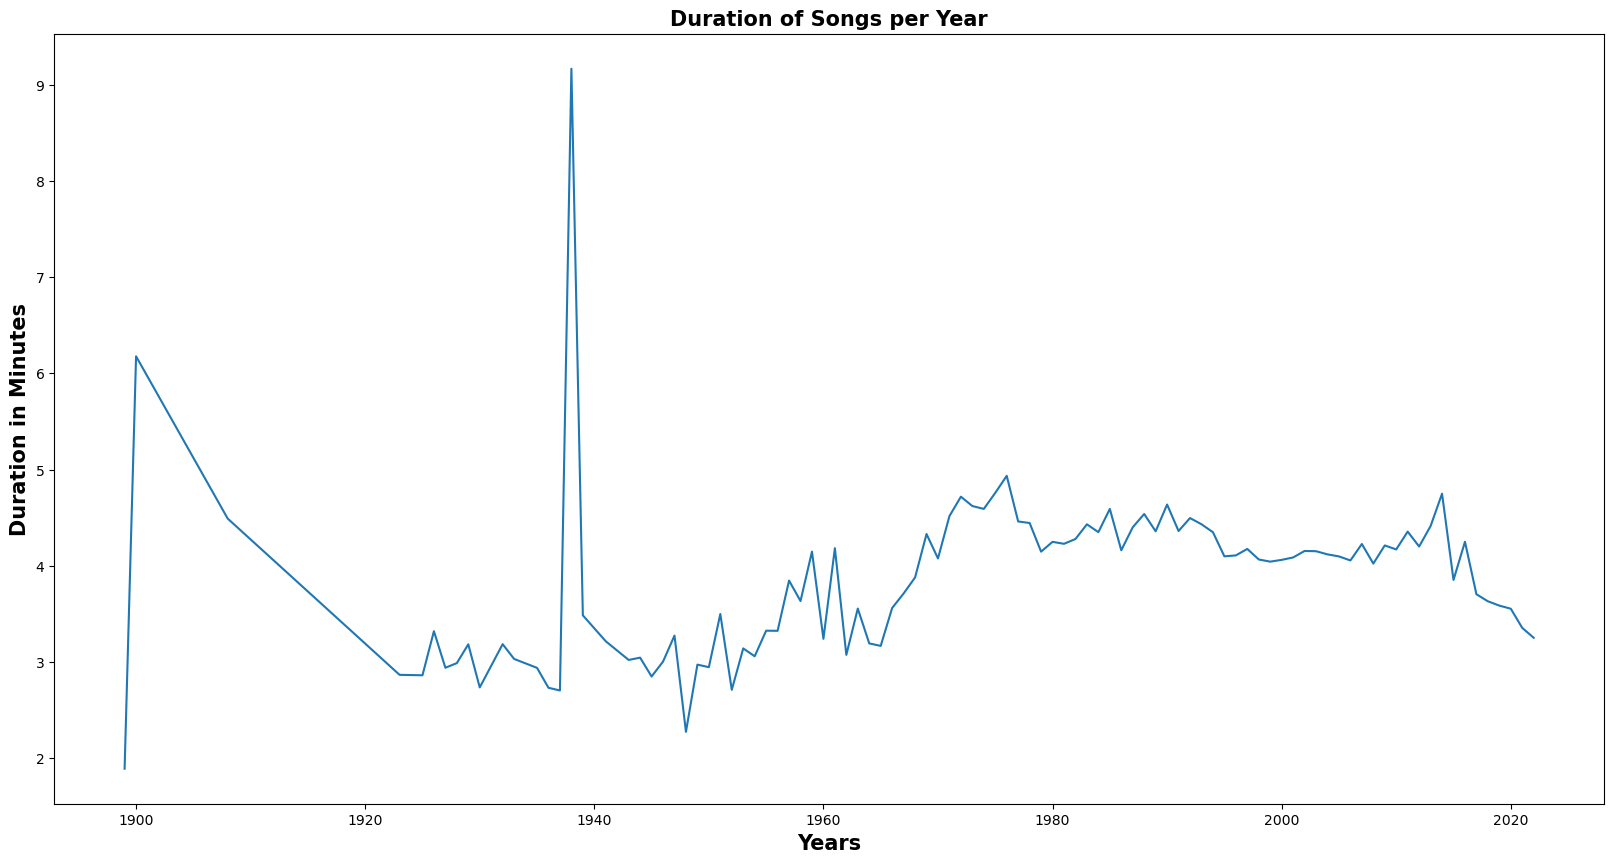

In [197]:
# Average duration of tracks per year
spotify_year_df['duration']['mean'].plot(figsize=(20,10))
plt.title('Duration of Songs per Year', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Years', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Duration in Minutes', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()
plt.show()

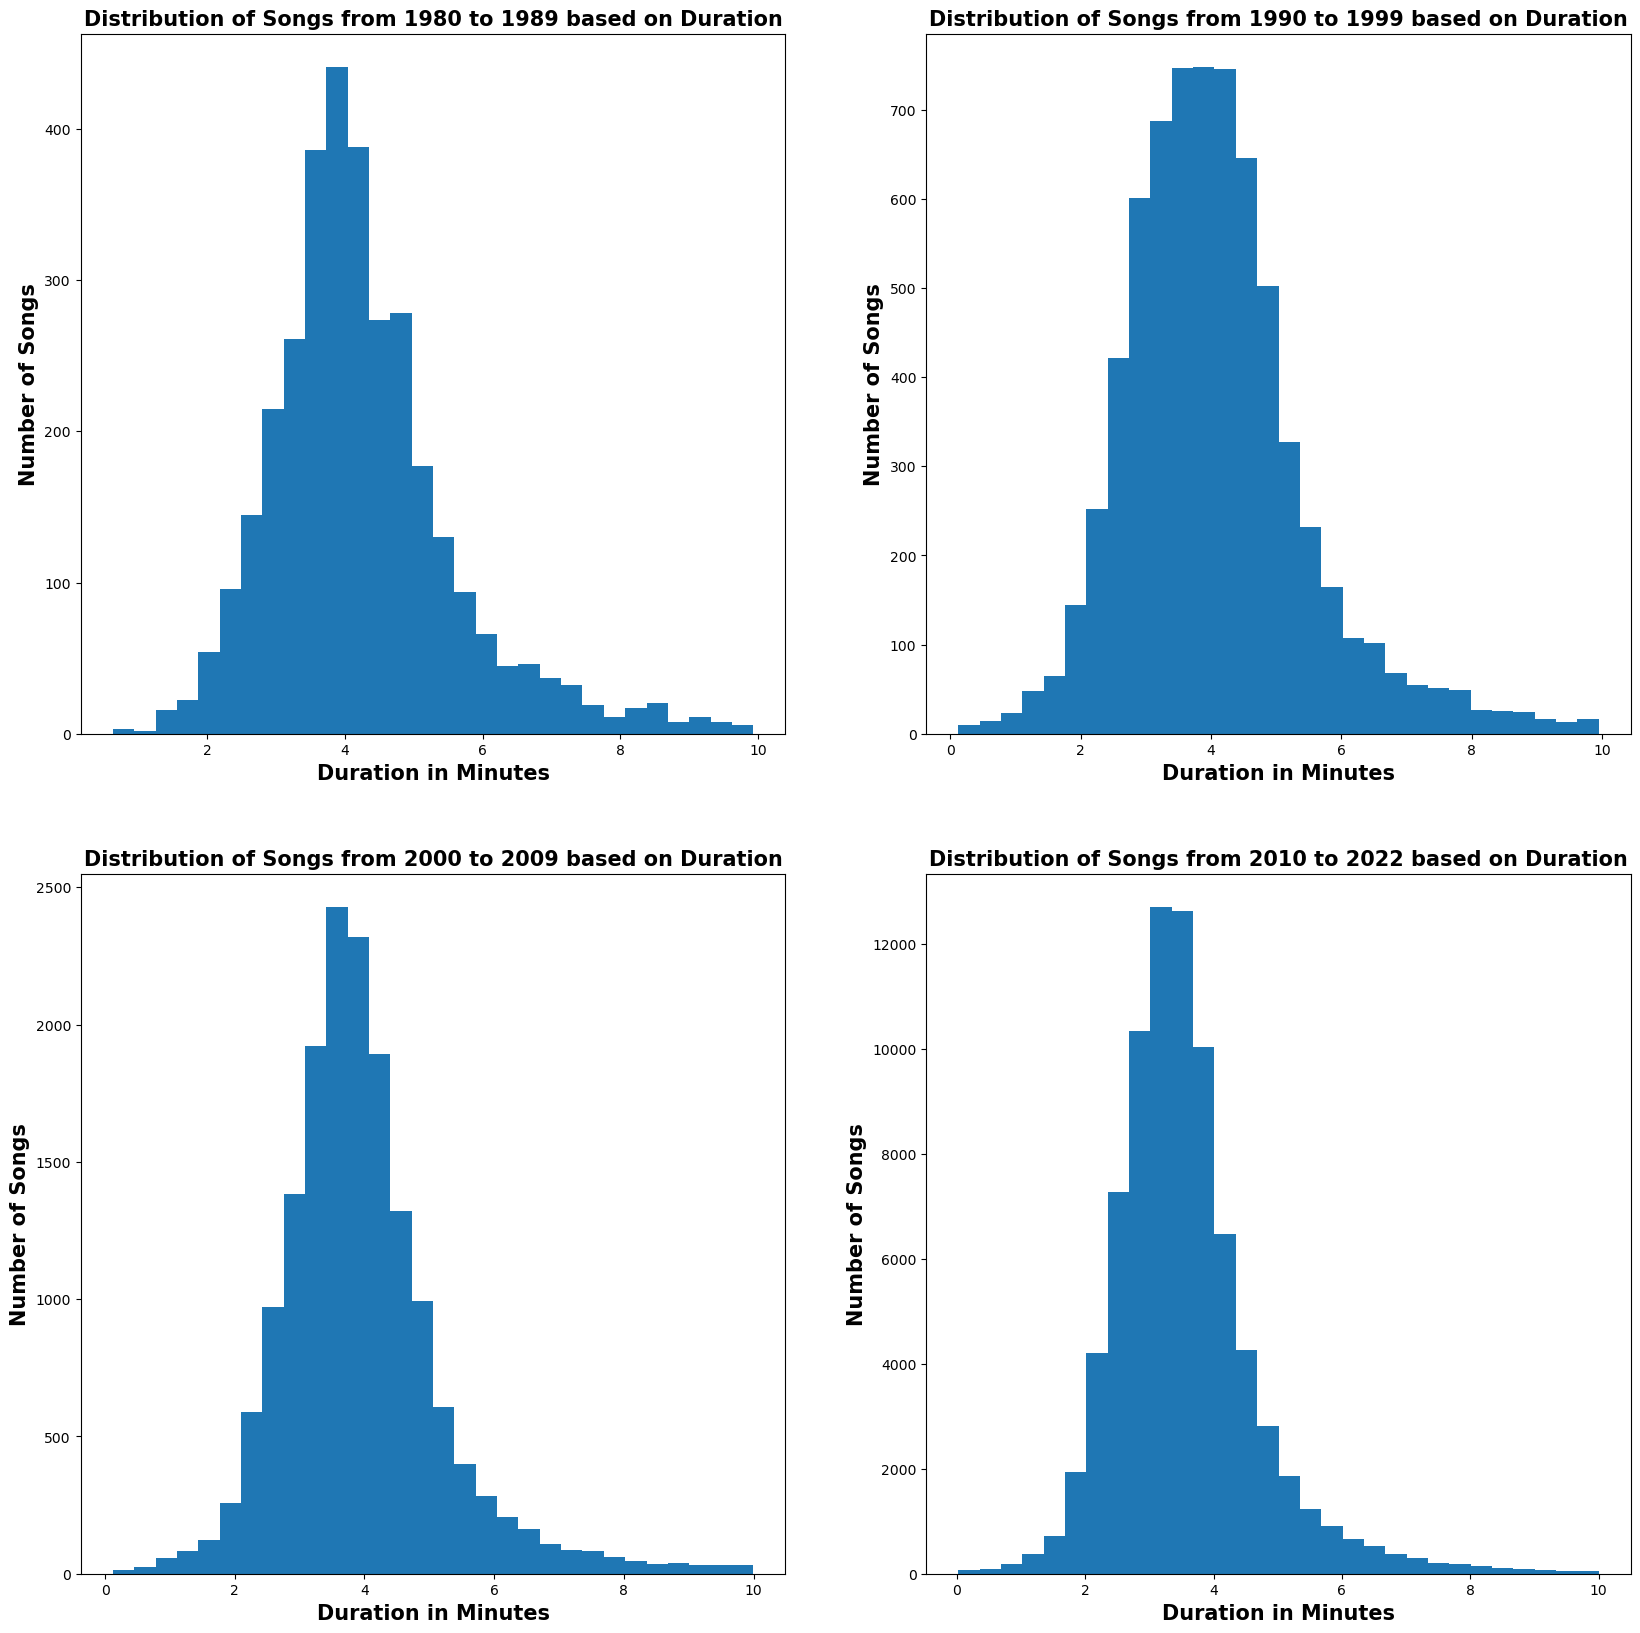

In [198]:
# Distribution of songs based on duration

#Separate 
prev_years = [1980, 1990, 2000, 2010]
end_years = [1989, 1999, 2009, 2022]
lower_duration = 0
upper_duration = 10
duration_limit = (spotify_clean_df['duration'] >= lower_duration) & (spotify_clean_df['duration'] <= upper_duration) 

fig = plt.figure(figsize=(20,20))

for i in range(len(prev_years)):
    
    ax = fig.add_subplot(2, 2, i+1)
    spotify_yrRange_df = spotify_clean_df.loc[duration_limit & (spotify_clean_df['release_year'] >= prev_years[i]) & (spotify_clean_df['release_year'] <= end_years[i])]
    ax.hist(spotify_yrRange_df['duration'], bins = 30)
    plt.title('Distribution of Songs from ' + str(prev_years[i]) + ' to ' + str(end_years[i]) + ' based on Duration', fontdict=dict(fontsize=15), fontweight='bold')
    plt.xlabel('Duration in Minutes', fontdict=dict(fontsize=15), fontweight='bold')
    plt.ylabel('Number of Songs', fontdict=dict(fontsize=15), fontweight='bold')

plt.show()

distribution of the songs are not normally distributed but rather skewed to the right

In [199]:
# Some tracks are more than an hour long
outlier = spotify_clean_df[(spotify_clean_df['duration'] >= 260) & (spotify_clean_df['release_year'] == 2016)]
outlier

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
10843,The Rise and Fall of Bossanova Section IV,P C III,The Rise and Fall of Bossanova (A 13:23:32 Song),2016-11-01,260.9,0.25,spotify:track:0q5lnUuDhlogtYCOubNQhQ,0.216024,0.0477,1,0.582593,1,0.053926,0.932731,0.85,0.176,0.01992,0.355998,4,2016


In [200]:
data1 = spotify_top100_df[relevant_qualities[0]]
data2 = spotify_out100_df[relevant_qualities[0]]
data1.rename('Top 100', inplace=True)
data2.rename('Remaining', inplace=True)
final_df = pd.concat([data1, data2], axis=1)
final_df

,Top 100,Remaining
21104,0.405680,0.405680
21118,0.635903,0.447262
21092,0.636917,0.663286
21085,0.597363,0.526369
21097,0.623732,0.660243
...,...,...
113942,NaN,0.541582
113943,NaN,0.640974
113944,NaN,0.587221
113945,NaN,0.619675


ValueError: num must be 1 <= num <= 8, not 9

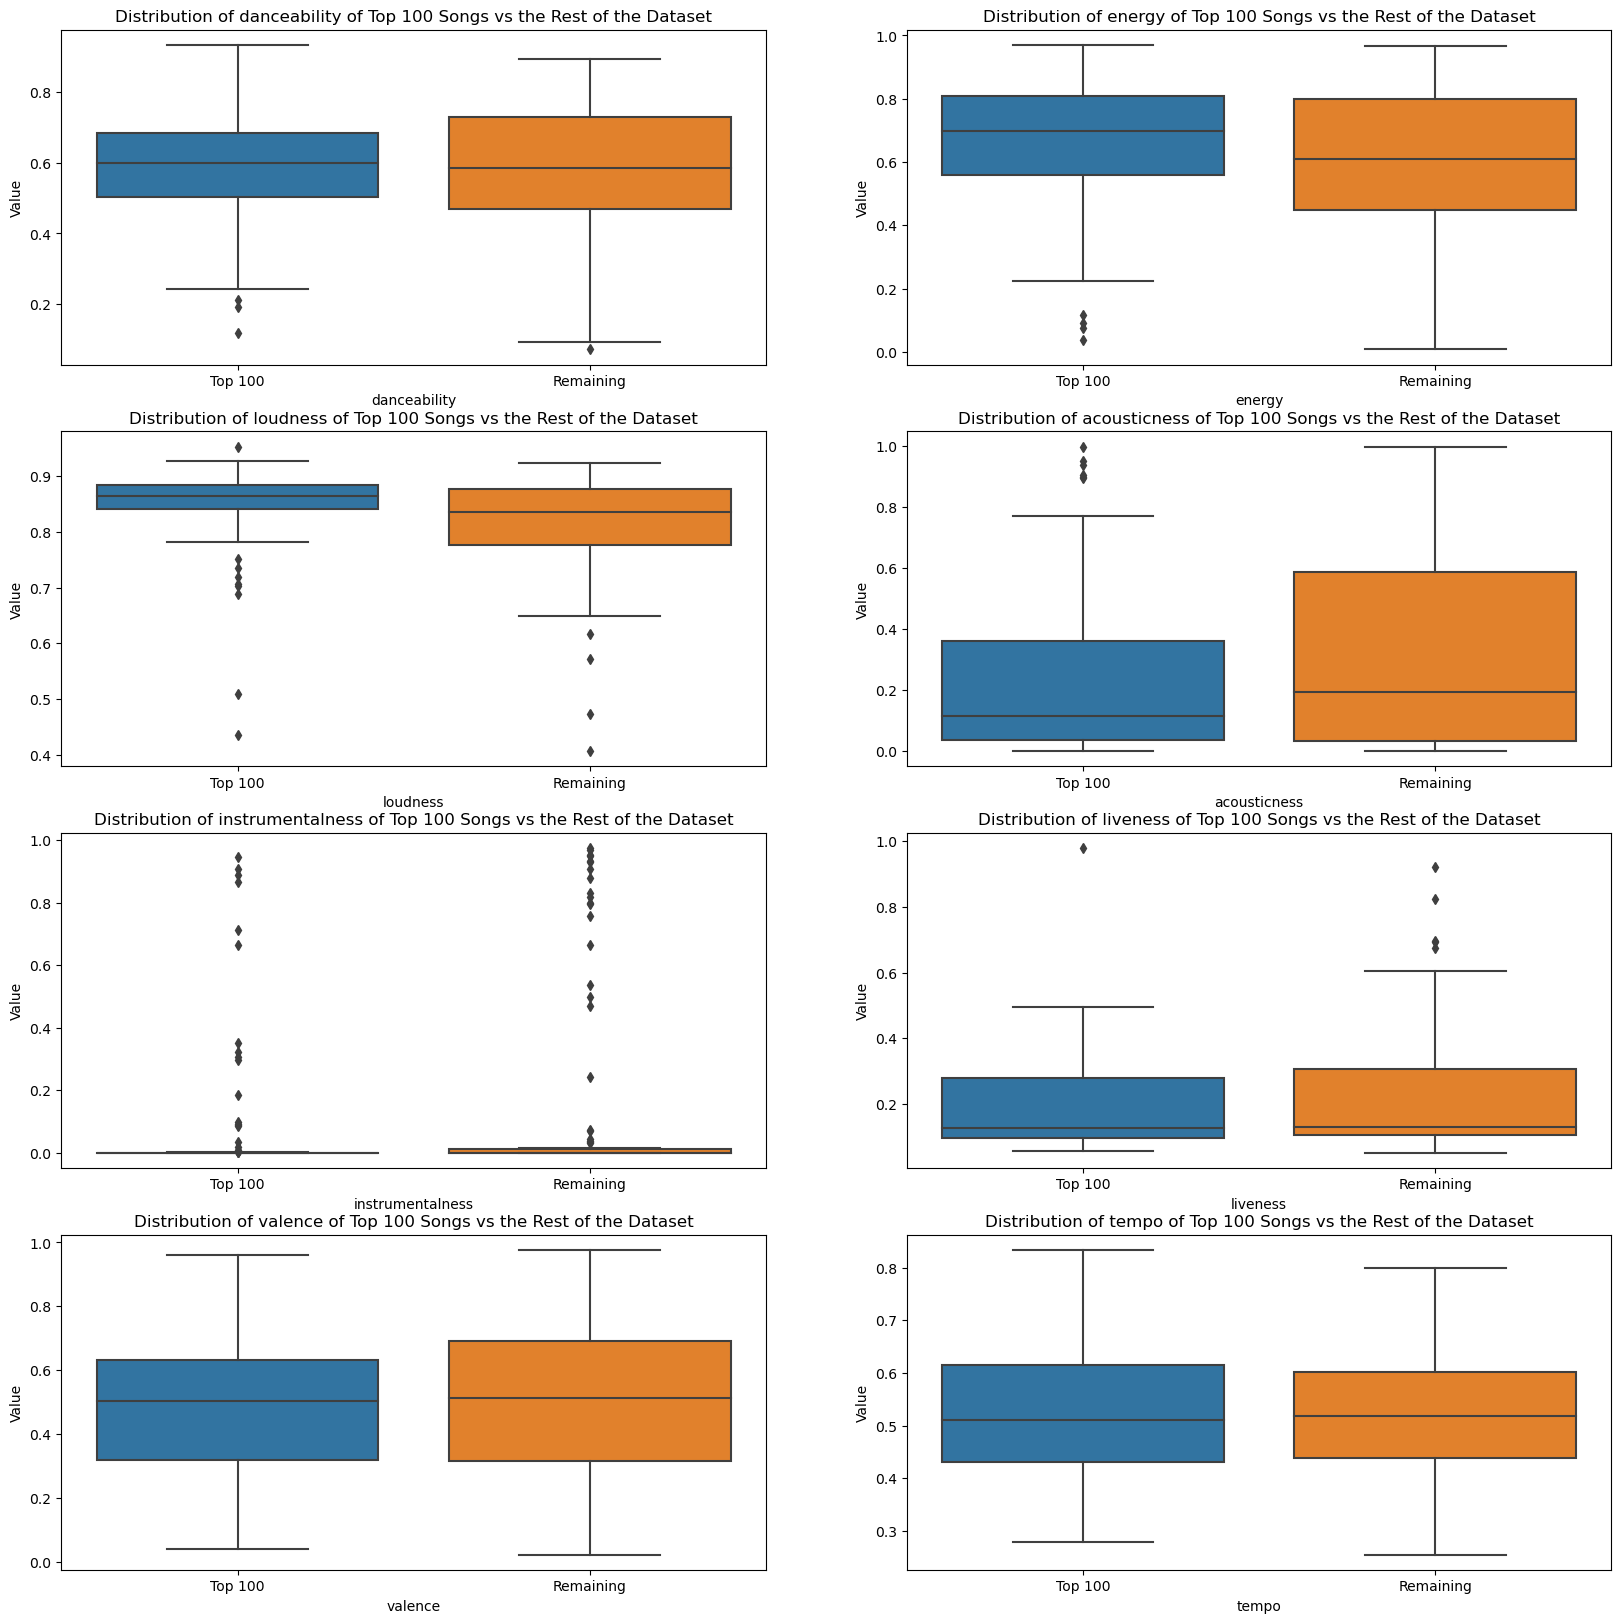

In [201]:
# Compare each audio feature of the top 100 songs with the rest of the dataset (box plots)
fig = plt.figure(figsize=(20,20))

for i in range(len(relevant_qualities)):
    ax = fig.add_subplot(4, 2, i+1)
    
    data1 = spotify_top100_df[relevant_qualities[i]]
    data2 = spotify_out100_df[relevant_qualities[i]]
    data1.rename('Top 100', inplace=True)
    data2.rename('Remaining', inplace=True)
    final_df = pd.concat([data1, data2], axis=1)
                              
    sns.boxplot(data=final_df.dropna())
    plt.title('Distribution of '+relevant_qualities[i]+' of Top 100 Songs vs the Rest of the Dataset')
    plt.xlabel(relevant_qualities[i])
    plt.ylabel('Value')
plt.show()

## Research Questions

We aim to answer the following questions:

* **Main Problem**
1. What are the qualities of the clusters that might arise based on the songs' audio features?

Knowing the general description of the clusters formed (based on the similarities in their audio features) is essential in creating our recommendation system. 

As much as possible, we would want to recommend songs that are similar to the user's own music preferences.

And we can do that by matching their top played songs—assuming this represents their preferences—to the cluster that those top played songs might belong to.


Additionally, we also want to ask these questions:

* **Sub-problems**
1. Is there a significant correlation between the average factors of the Spotify Dataset (Duration, Loudness, Valence, Tempo, Energy, and Danceability) with each other?
2. Does the average factors of the Spotify Dataset affect the Danceability and Energy of the song?
3. Are outliers in the dataset significant? If so, what does it tell us?
4. Would the clusters formed from the dataset provide recommendations relevant to the user?
5. Will the clusters reflect or capture the qualities of specific music genres?

## Data Mining: Recommendation System

### Preparing actual user data 

#### Loading user dataset

In [202]:
#  reading user data into pandas DataFrame
user_1_tracks = pd.read_json("data\\users\\aexylian_tracks.json")
user_1_tracks_feat = pd.read_json("data\\users\\aexylian_features.json")

#  joining the two datasets with SQL inner join-like mechanism 
user_1_df = user_1_tracks.join(user_1_tracks_feat, how="inner",rsuffix="_duplicate")

#  dropping the duplicated key column 
user_1_df = user_1_df.drop(columns="uri_duplicate")
user_1_df.head()

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,All Alone,Acid Ghost,All Alone,2015-01-30,168648,51,spotify:track:72xnRXxHiAhTfKSzlPdEmo,0.509,0.588,0,-9.542,1,0.0298,0.693,0.845000,0.1150,0.4870,171.845,4
1,From Eden,Hozier,Hozier (Special Edition),2014-11-06,283466,43,spotify:track:5ltHoAqXvRiOQvcAqpHo3U,0.395,0.676,0,-5.460,1,0.0498,0.608,0.000049,0.1170,0.3150,142.929,5
2,Cherry Wine - Live,Hozier,Hozier (Special Edition),2014-11-06,240147,46,spotify:track:1FWFmQZwvNctmy8kT5ESw1,0.418,0.111,1,-14.848,1,0.0389,0.953,0.003420,0.0982,0.2280,82.508,4
3,In A Week,Hozier,Hozier (Special Edition),2014-11-06,318493,38,spotify:track:3FmGVePfqBiM5XESN35ZHK,0.481,0.260,0,-12.241,1,0.0307,0.794,0.000003,0.1420,0.1690,131.319,3
4,Falling,Harry Styles,Fine Line,2019-12-13,240133,84,spotify:track:1ZMiCix7XSAbfAJlEZWMCp,0.567,0.267,4,-6.502,1,0.0299,0.839,0.000001,0.0890,0.0592,110.011,4


In [203]:
#  reading user data into pandas DataFrame
user_2_tracks = pd.read_json("data\\users\\jmhgqk29p607xydvfclivake4_tracks.json")
user_2_tracks_feat = pd.read_json("data\\users\\jmhgqk29p607xydvfclivake4_features.json")

#  joining the two datasets with SQL inner join-like mechanism 
user_2_df = user_2_tracks.join(user_2_tracks_feat, how="inner",rsuffix="_duplicate")

#  dropping the duplicated key column 
user_2_df = user_2_df.drop(columns="uri_duplicate")
user_2_df.head()

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,I CAN'T STOP ME,TWICE,Eyes Wide Open,2020-10-26,205493,75,spotify:track:37ZtpRBkHcaq6hHy0X98zn,0.657,0.880,10,-3.672,0,0.1020,0.1210,0.000000,0.4630,0.769,150.084,4
1,CRY FOR ME,TWICE,CRY FOR ME,2020-12-18,204167,72,spotify:track:2xtP8RNbo2BEMzLX7tK7aq,0.702,0.692,10,-5.405,1,0.0539,0.0542,0.000000,0.0877,0.419,144.896,4
2,HANDLE IT,TWICE,Eyes Wide Open,2020-10-26,171053,51,spotify:track:2laLdXRHMaHCuqr3DXgzhZ,0.509,0.574,5,-6.035,0,0.2620,0.5330,0.000000,0.0898,0.690,85.960,4
3,UP NO MORE,TWICE,Eyes Wide Open,2020-10-26,214240,61,spotify:track:1LiNP5q2thWScdvCRkJ584,0.709,0.880,2,-2.734,1,0.0585,0.0298,0.000004,0.1030,0.713,119.948,4
4,Circles,Post Malone,Hollywood's Bleeding,2019-09-06,215280,86,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,4


#### Scaling numeric features

In [204]:
user_1_df.loc[:, to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,50.0,0.496360,0.108753,0.263000,0.422500,0.488500,0.568750,0.705
energy,50.0,0.529268,0.237183,0.085400,0.356000,0.523500,0.707000,0.984
loudness,50.0,-7.692460,3.630819,-15.634000,-9.517500,-6.896500,-4.759500,-2.484
speechiness,50.0,0.049282,0.040279,0.026000,0.029125,0.034100,0.047850,0.231
acousticness,50.0,0.384456,0.347467,0.000023,0.027450,0.348000,0.721000,0.968
instrumentalness,50.0,0.116642,0.252105,0.000000,0.000007,0.000198,0.014875,0.884
liveness,50.0,0.205682,0.225398,0.046000,0.099125,0.113000,0.215500,0.945
valence,50.0,0.351106,0.238591,0.058200,0.163000,0.278000,0.498250,0.966
tempo,50.0,117.362200,31.371516,67.559000,92.427000,115.860000,138.945000,177.549
popularity,50.0,56.040000,16.039441,0.000000,46.000000,57.500000,65.000000,84.000


In [205]:
user_2_df.loc[:, to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,50.0,0.673600,0.119020,0.303000,0.629500,0.68950,0.733250,0.92100
energy,50.0,0.732240,0.178342,0.255000,0.617250,0.80550,0.865500,0.95900
loudness,50.0,-4.553460,2.346752,-12.780000,-5.606500,-3.83150,-3.132000,-1.33800
speechiness,50.0,0.086128,0.076532,0.025300,0.045375,0.06035,0.084450,0.35700
acousticness,50.0,0.180534,0.217255,0.000282,0.029650,0.10985,0.192750,0.78500
instrumentalness,50.0,0.000215,0.000744,0.000000,0.000000,0.00000,0.000004,0.00404
liveness,50.0,0.206088,0.197948,0.058800,0.097350,0.11400,0.244500,0.93000
valence,50.0,0.545280,0.190561,0.129000,0.421250,0.56550,0.699000,0.92500
tempo,50.0,123.434900,23.879590,79.826000,106.159000,125.49700,138.652250,185.77000
popularity,50.0,55.080000,26.067291,0.000000,49.250000,60.00000,74.250000,88.00000


In [206]:
user_1_scaled_df = user_1_df.copy()

user_1_scaled_df.loc[:, to_scale] = scaler.fit_transform(user_1_scaled_df.loc[:, to_scale])

user_1_scaled_df.loc[:, to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,50.0,0.527964,0.246047,0.0,0.360860,0.510181,0.691742,1.0
energy,50.0,0.493955,0.263948,0.0,0.301135,0.487536,0.691743,1.0
loudness,50.0,0.603919,0.276108,0.0,0.465133,0.664449,0.826958,1.0
speechiness,50.0,0.113571,0.196481,0.0,0.015244,0.039512,0.106585,1.0
acousticness,50.0,0.397151,0.358962,0.0,0.028334,0.359489,0.744829,1.0
instrumentalness,50.0,0.131948,0.285187,0.0,0.000008,0.000224,0.016827,1.0
liveness,50.0,0.177622,0.250721,0.0,0.059093,0.074527,0.188543,1.0
valence,50.0,0.322655,0.262823,0.0,0.115444,0.242124,0.484743,1.0
tempo,50.0,0.452798,0.285222,0.0,0.226093,0.439140,0.649023,1.0
popularity,50.0,0.667143,0.190946,0.0,0.547619,0.684524,0.773810,1.0


In [207]:
user_2_scaled_df = user_2_df.copy()

user_2_scaled_df.loc[:, to_scale] = scaler.fit_transform(user_2_scaled_df.loc[:, to_scale])

user_2_scaled_df.loc[:, to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,50.0,0.599676,0.192589,0.0,0.528317,0.625405,0.696197,1.0
energy,50.0,0.677898,0.253326,0.0,0.514560,0.781960,0.867188,1.0
loudness,50.0,0.718977,0.205100,0.0,0.626945,0.782075,0.843209,1.0
speechiness,50.0,0.183383,0.230726,0.0,0.060522,0.105668,0.178324,1.0
acousticness,50.0,0.229703,0.276858,0.0,0.037425,0.139627,0.245270,1.0
instrumentalness,50.0,0.053165,0.184056,0.0,0.000000,0.000000,0.000912,1.0
liveness,50.0,0.169063,0.227213,0.0,0.044249,0.063361,0.213154,1.0
valence,50.0,0.522965,0.239398,0.0,0.367148,0.548367,0.716080,1.0
tempo,50.0,0.411622,0.225398,0.0,0.248556,0.431086,0.555258,1.0
popularity,50.0,0.625909,0.296219,0.0,0.559659,0.681818,0.843750,1.0


#### Find the average qualities of the sample user's top 50 tracks

In [208]:
user1_num_df = user_1_scaled_df.copy()

user1_num_df = user1_num_df[relevant_qualities]
ave_user1_pref = user1_num_df.mean()
ave_user1_pref

danceability        0.527964
energy              0.493955
loudness            0.603919
acousticness        0.397151
instrumentalness    0.131948
liveness            0.177622
valence             0.322655
tempo               0.452798
popularity          0.667143
dtype: float64

In [209]:
user2_num_df = user_2_scaled_df.copy()

user2_num_df = user2_num_df[relevant_qualities]
ave_user2_pref = user2_num_df.mean()
ave_user2_pref

danceability        0.599676
energy              0.677898
loudness            0.718977
acousticness        0.229703
instrumentalness    0.053165
liveness            0.169063
valence             0.522965
tempo               0.411622
popularity          0.625909
dtype: float64

In [210]:
#  kindly visualize this with a line_polar using plotly express
fig = px.line_polar(ave_user1_pref, 
                    r=ave_user1_pref,
                    theta=relevant_qualities,
                    line_close=True,
                    title="Average Features of User1 Top Songs")
fig.show()

a:\programming-tools\Anaconda\envs\data102\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [211]:
#  kindly visualize this with a line_polar using plotly express
fig = px.line_polar(ave_user2_pref, 
                    r=ave_user2_pref,
                    theta=relevant_qualities,
                    line_close=True,
                    title="Average Features of User2 Top Songs")
fig.show()

a:\programming-tools\Anaconda\envs\data102\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [323]:
pca = PCA(n_components=0.95)
reduced_dimension_user1 = pca.fit_transform(user1_num_df) 
reduced_dimension_user1_df = pd.DataFrame(reduced_dimension_user1, index=user1_num_df.index)
reduced_dimension_user1_mean = np.array(reduced_dimension_user1_df.mean()).reshape(1,-1)
reduced_dimension_user1_mean

array([[-1.35447209e-16, -2.22044605e-18, -3.77475828e-17,
        -1.52655666e-17,  6.21724894e-17, -1.79856130e-16,
         3.60822483e-17]])

### Clustering the songs with K-means

#### Preparing dataframe 

In [315]:
#  initializing a cluster dataframe
cluster_df = spotify_clean_df.copy()

#  URI as index
cluster_df = cluster_df.set_index("uri")

#  removing unneccesary features from the cluster dataframe
cluster_df = cluster_df[relevant_qualities]

#  random sampling songs from the dataset
cluster_df = cluster_df.sample(n=60000)
cluster_df.columns

Index(['danceability', 'energy', 'loudness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity'],
      dtype='object')

#### Reducing dimensionality

In [316]:
pca = PCA(n_components=0.95)
reduced_dimension = pca.fit_transform(cluster_df) 
reduced_dimension_df = pd.DataFrame(reduced_dimension, index=cluster_df.index)
reduced_dimension_df.columns

RangeIndex(start=0, stop=7, step=1)

#### Determining the *k* or the most optimal number of clusters
- Elbow method
- Silhoutte coefficient 
- Davies-Bouldin score

In [317]:
#  initialize k array
k_list = [k for k in range(2,11)]

#  initialize WCSS/inertia array
inertia_list = []

#  initialize silhouette coefficient array
silhouette_list = []

#  initialize davies-bouldin score array
db_list = []

In [318]:
for k in k_list:
    #  running kmeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=10).fit(reduced_dimension_df)
    clusters = kmeans.labels_
    
    print(k, clusters)
    #  diagnostic indicators 
    #  for elbow method
    inertia = kmeans.inertia_
    inertia_list.append(inertia)
    
    #  for silhouette coeffiicent
    silhouette_coef = silhouette_score(reduced_dimension_df, clusters)
    silhouette_list.append(silhouette_coef)
    
    #  for davies-bouldin score
    db_score = davies_bouldin_score(reduced_dimension_df, clusters)
    db_list.append(db_score)

2 [1 1 1 ... 1 1 0]
3 [0 0 1 ... 0 0 1]
4 [2 2 1 ... 2 2 1]
5 [0 0 0 ... 3 3 2]
6 [5 5 5 ... 4 4 0]
7 [1 1 1 ... 5 5 2]
8 [0 0 0 ... 6 6 1]
9 [6 6 0 ... 0 5 4]
10 [0 0 3 ... 3 5 1]


Text(0.5, 0, 'k')

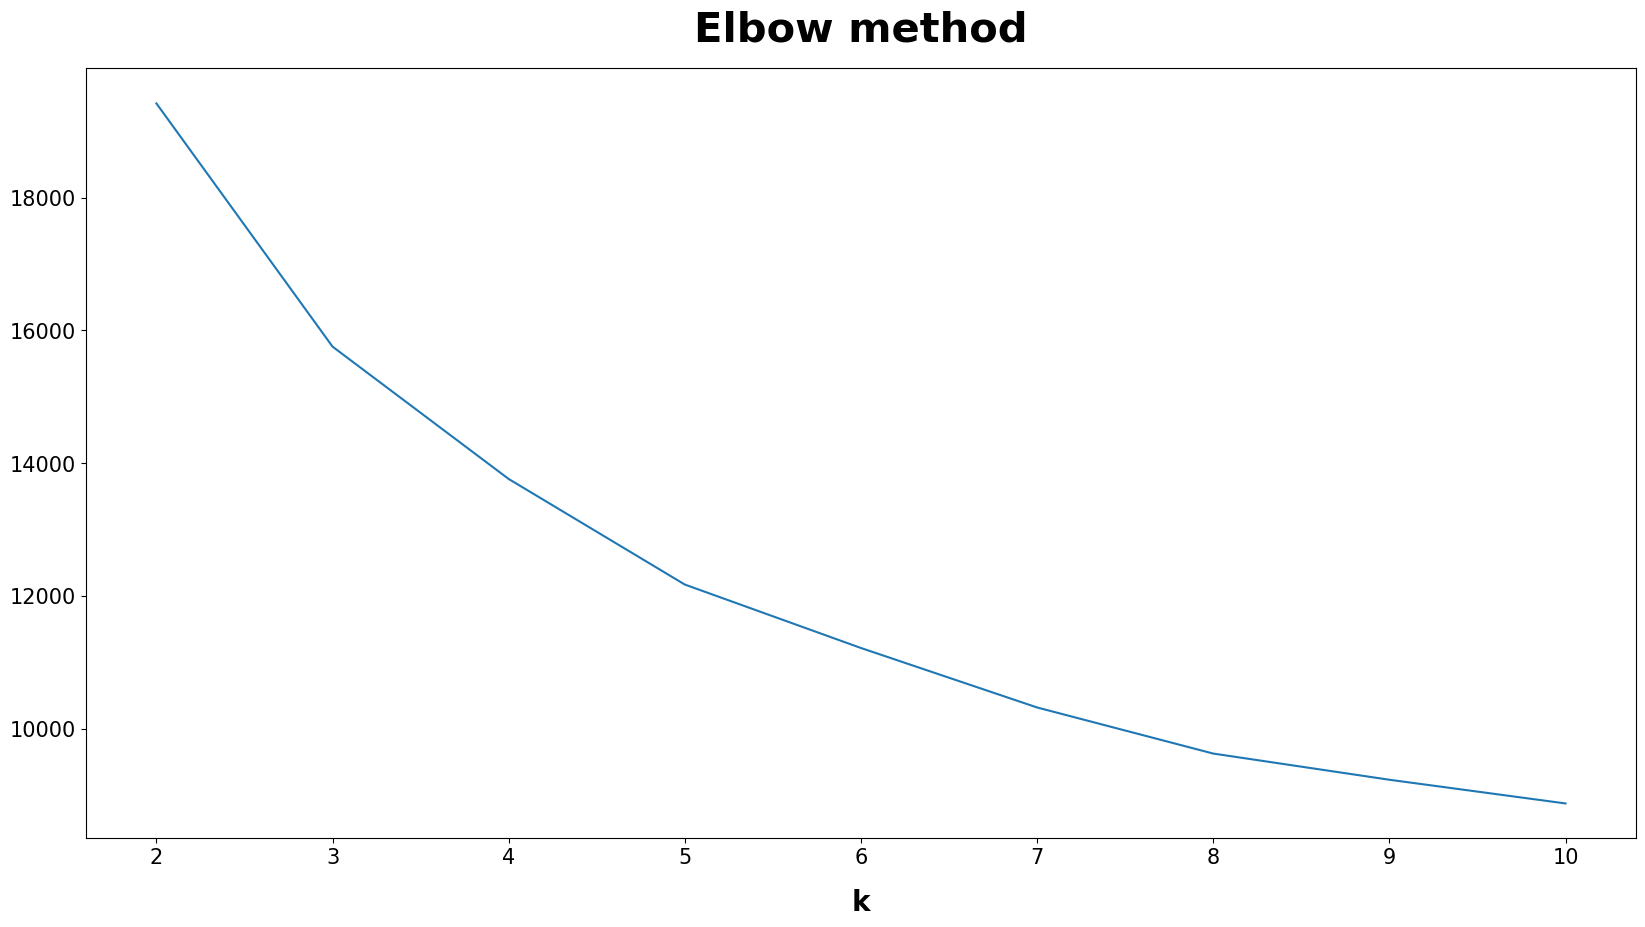

In [319]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(k_list, inertia_list)
plt.title("Elbow method", 
          fontdict={"fontsize": 30,
                    "fontweight": "bold"},
          pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel("k", fontsize=20, fontweight="bold", labelpad=15)

Text(0.5, 0, 'k')

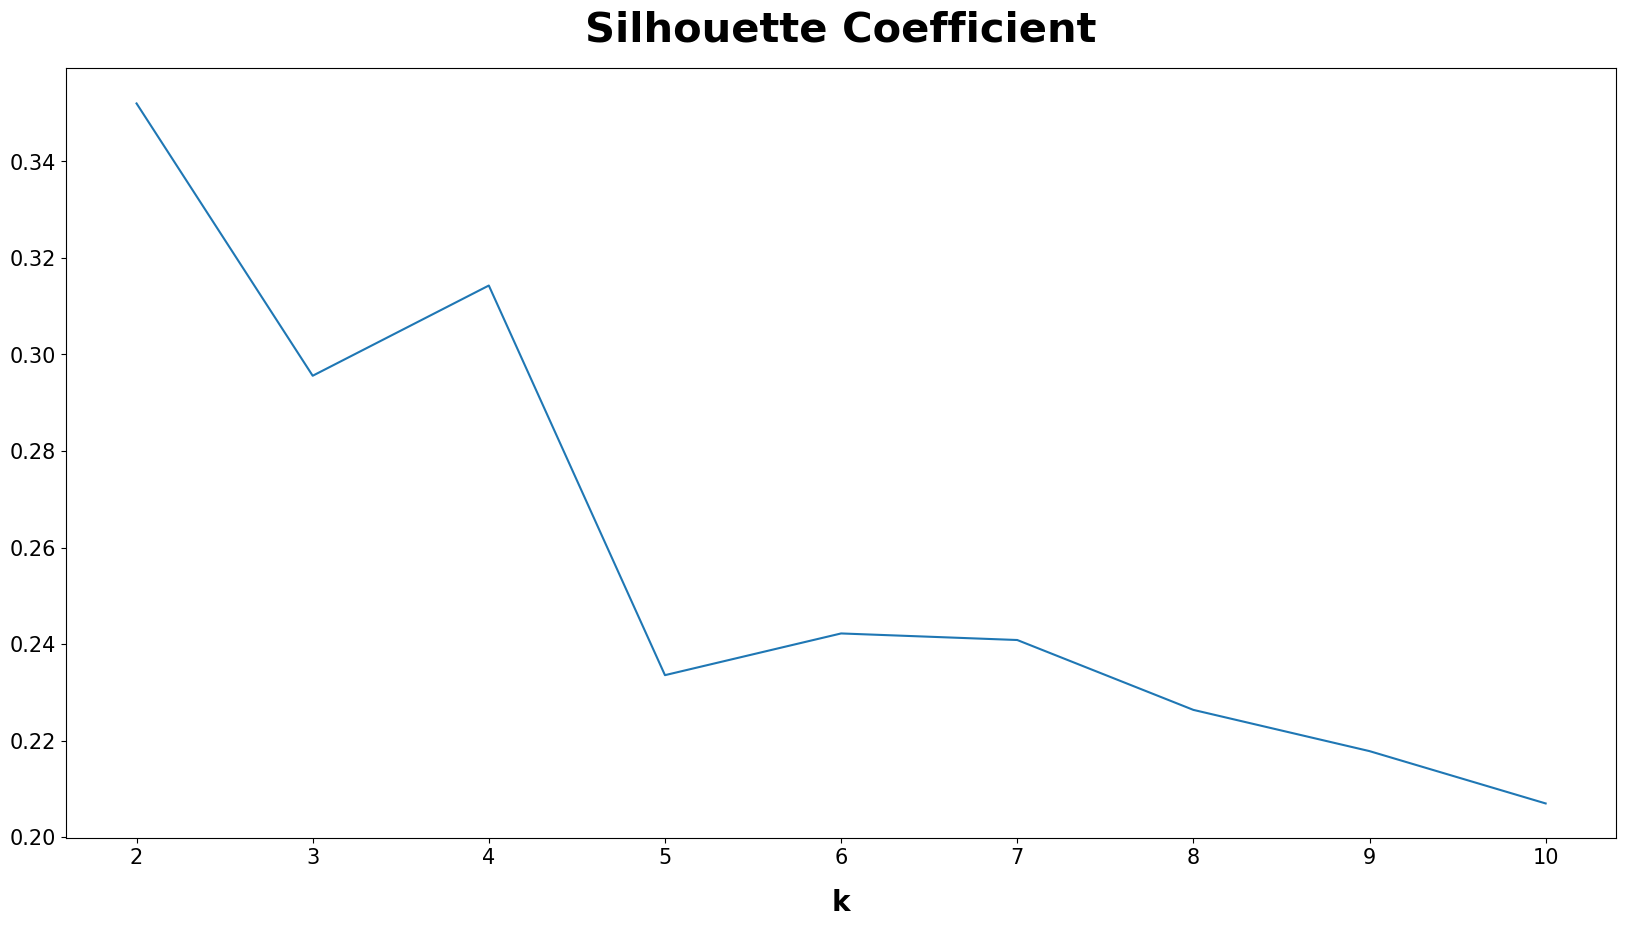

In [320]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(k_list, silhouette_list)
plt.title("Silhouette Coefficient", 
          fontdict={"fontsize": 30,
                    "fontweight": "bold"},
          pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel("k", fontsize=20, fontweight="bold", labelpad=15)

Text(0.5, 0, 'k')

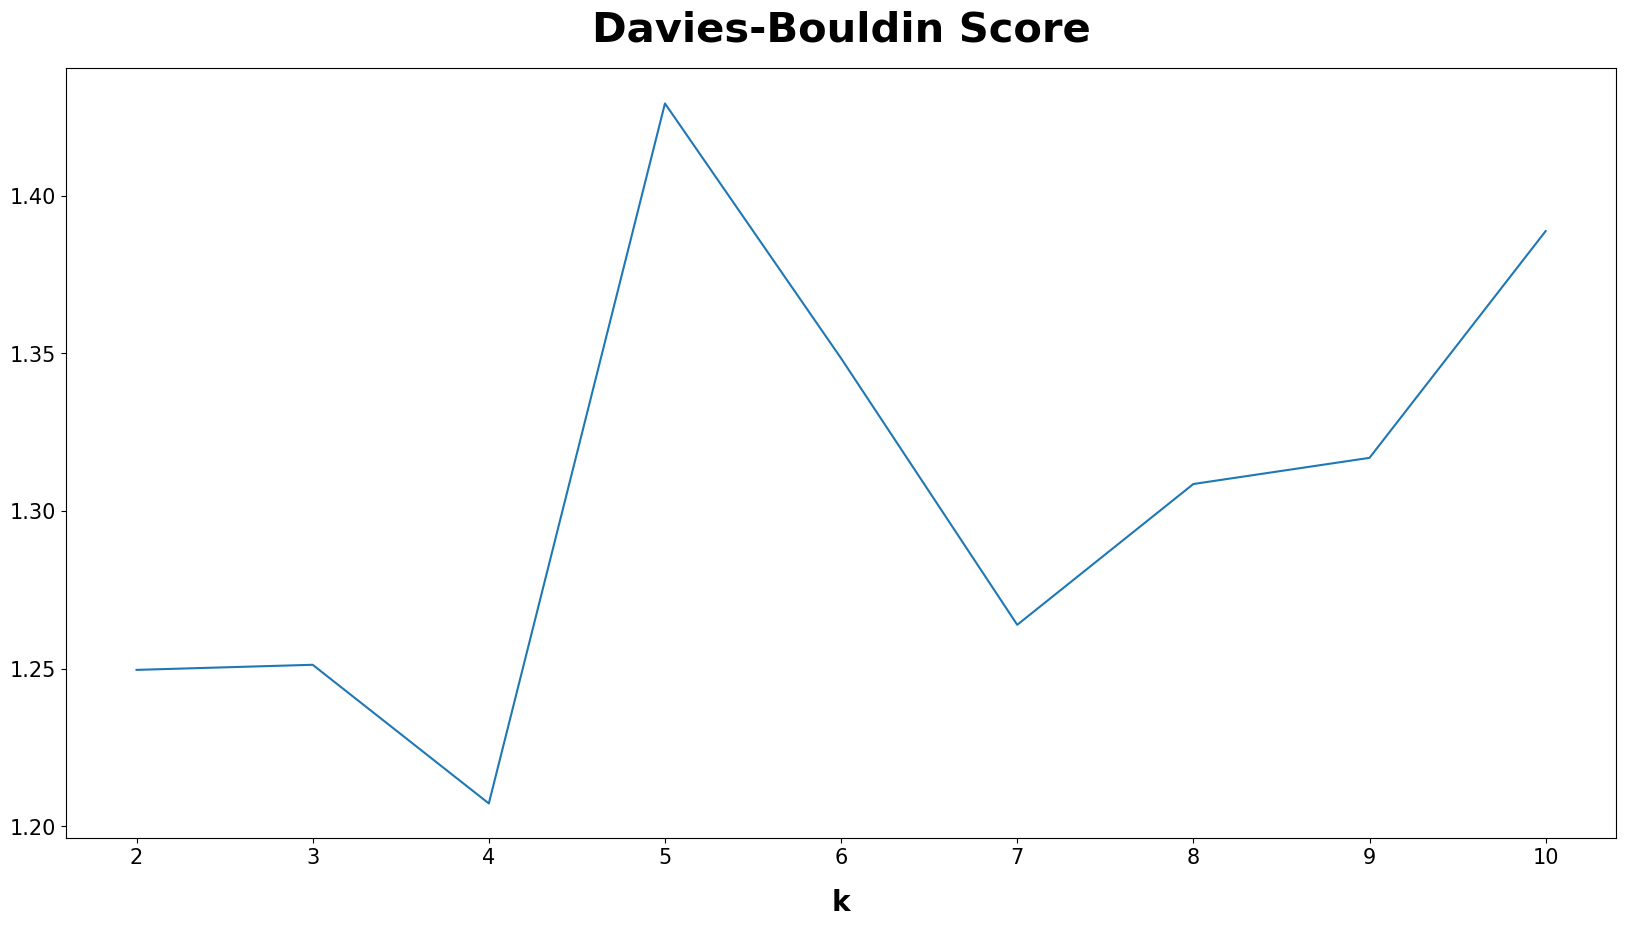

In [321]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(k_list, db_list)
plt.title("Davies-Bouldin Score", 
          fontdict={"fontsize": 30,
                    "fontweight": "bold"},
          pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel("k", fontsize=20, fontweight="bold", labelpad=15)

#### Clustering with 4 clusters

In [324]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(reduced_dimension_df)
cluster_df["cluster"] = kmeans.labels_
cluster_df

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,popularity,cluster
uri,,,,,,,,,,
spotify:track:2kCizKXvF27rJLPVvgIIvm,0.658215,0.766,0.872352,0.037550,0.000871,0.0942,0.202202,0.407820,0.43,2
spotify:track:7vF3xkCMvZjAe2nTWY0uQZ,0.478702,0.709,0.877428,0.001948,0.000022,0.3210,0.338338,0.512130,0.70,2
spotify:track:204qtDaLSeZcqioRWA3UGD,0.492901,0.412,0.800416,0.210843,0.023200,0.1140,0.180180,0.345556,0.41,1
spotify:track:5yRBRUdJ0BFbuFJ3LP7M6O,0.577079,0.126,0.704172,0.177711,0.000035,0.4780,0.066066,0.429136,0.00,1
spotify:track:1OqjCvgq2huHFm5YuL6A8G,0.519270,0.214,0.788070,0.050904,0.665000,0.1090,0.724725,0.416296,0.54,3
...,...,...,...,...,...,...,...,...,...,...
spotify:track:4TY0F64NzsNguy8p0I2Nge,0.492901,0.274,0.746016,0.496988,0.953000,0.1040,0.052753,0.584211,0.38,0
spotify:track:5lIqY3Yb3bPj5z1tiUIiCJ,0.622718,0.527,0.858772,0.599398,0.000000,0.1100,0.354354,0.507692,0.51,1
spotify:track:1j1jFRnapbAfyF4pmzFNv0,0.810345,0.449,0.718472,0.166667,0.000000,0.1220,0.553554,0.407845,0.39,2


In [325]:
kmeans.predict(reduced_dimension_user1_mean)

array([2])

In [326]:
stuff = cosine_similarity(reduced_dimension_df, reduced_dimension_user_mean).reshape(reduced_dimension_df.shape[0])
stuff = pd.Series(stuff, index=reduced_dimension_df.index)
top_stuff = stuff.nlargest(10)
top_stuff.idxmax()

NameError: name 'reduced_dimension_user_mean' is not defined

In [ ]:
spotify_clean_df.query(f"uri == 'spotify:track:73pl1Ue8ON7QWLbe6SApr7'")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
20240,I Think Of You,Jeremih,I Think Of You,2017-02-03,3.629767,0.16,spotify:track:73pl1Ue8ON7QWLbe6SApr7,0.709939,0.653,11,0.855137,0,0.26343,0.140562,0.0,0.259,0.488488,0.574386,4,2017


In [274]:
user_mean = np.array(ave_user_pref).reshape(1,-1)

In [275]:
temp_df = cluster_df.query("cluster == 1")
temp_df = temp_df.iloc[:,:-1]

In [276]:
stuff2 = cosine_similarity(temp_df, user_mean).reshape(temp_df.shape[0])
stuff2 = pd.Series(stuff2, index=temp_df.index)
stuff2.nlargest(10)

uri
spotify:track:2QRoW3drlECOFZLtKFriG8    0.992546
spotify:track:6zX3HwSuoQThrabeoHJvCs    0.992045
spotify:track:6M2N8fKC1Ik2rX6ZFW9QOf    0.991088
spotify:track:23luOrEVHMfoX0AhfbQuS6    0.991088
spotify:track:6H3kDe7CGoWYBabAeVWGiD    0.991088
spotify:track:2nVUEKKPv9DDilSZwCcMfu    0.991068
spotify:track:3aiogw2fDBiS44nozu9CVa    0.990963
spotify:track:0tS9txsqPtXYamYzNQSrmL    0.990898
spotify:track:0yrELokXQCUyqY56bh7LT0    0.990707
spotify:track:0uZhRTUTRk3iaAlJPLswm1    0.990659
dtype: float64

In [282]:
spotify_clean_df.query("uri == 'spotify:track:0tS9txsqPtXYamYzNQSrmL'")

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
13494,Patience,The Lumineers,Cleopatra (Deluxe),2016-02-05,1.61755,0.0,spotify:track:0tS9txsqPtXYamYzNQSrmL,0.741379,0.704,9,0.851758,0,0.043182,0.513052,0.351,0.117,0.441441,0.581863,4,2016


#### Qualities of each cluster

In [327]:
cluster_song_qualities = cluster_df.groupby(by="cluster")[relevant_qualities].mean()

In [330]:
fig = go.Figure()

for i in range(len(cluster_song_qualities)):
    fig.add_trace(go.Scatterpolar(
            r = cluster_song_qualities.iloc[i],
            theta = relevant_qualities,
            mode = 'lines',
            name = cluster_song_qualities.index[i].astype(str),
        ))
    
fig.update_layout(
    title = 'Average Factors of Clusters',
    showlegend = True
)

fig.show()

#### Visualizing clusters

In [262]:
pca = PCA(n_components=2)
cluster_viz = pca.fit_transform(cluster_df.iloc[:,:-1]) 
cluster_viz

array([[ 0.7051222 ,  0.78842697],
       [-0.11159347,  0.10711673],
       [ 1.11708647,  0.1613788 ],
       ...,
       [ 1.15646461,  0.15374314],
       [ 0.46275216, -0.36719759],
       [-0.27461101,  0.33679228]])

In [282]:
kmeans_viz = KMeans(n_clusters=4, random_state=10).fit(cluster_viz)
label = kmeans_viz.labels_

In [283]:
centroids = kmeans_viz.cluster_centers_
u_labels = np.unique(label)

(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25]),
 [Text(0, -1.0, '−1.00'),
  Text(0, -0.75, '−0.75'),
  Text(0, -0.5, '−0.50'),
  Text(0, -0.25, '−0.25'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25')])

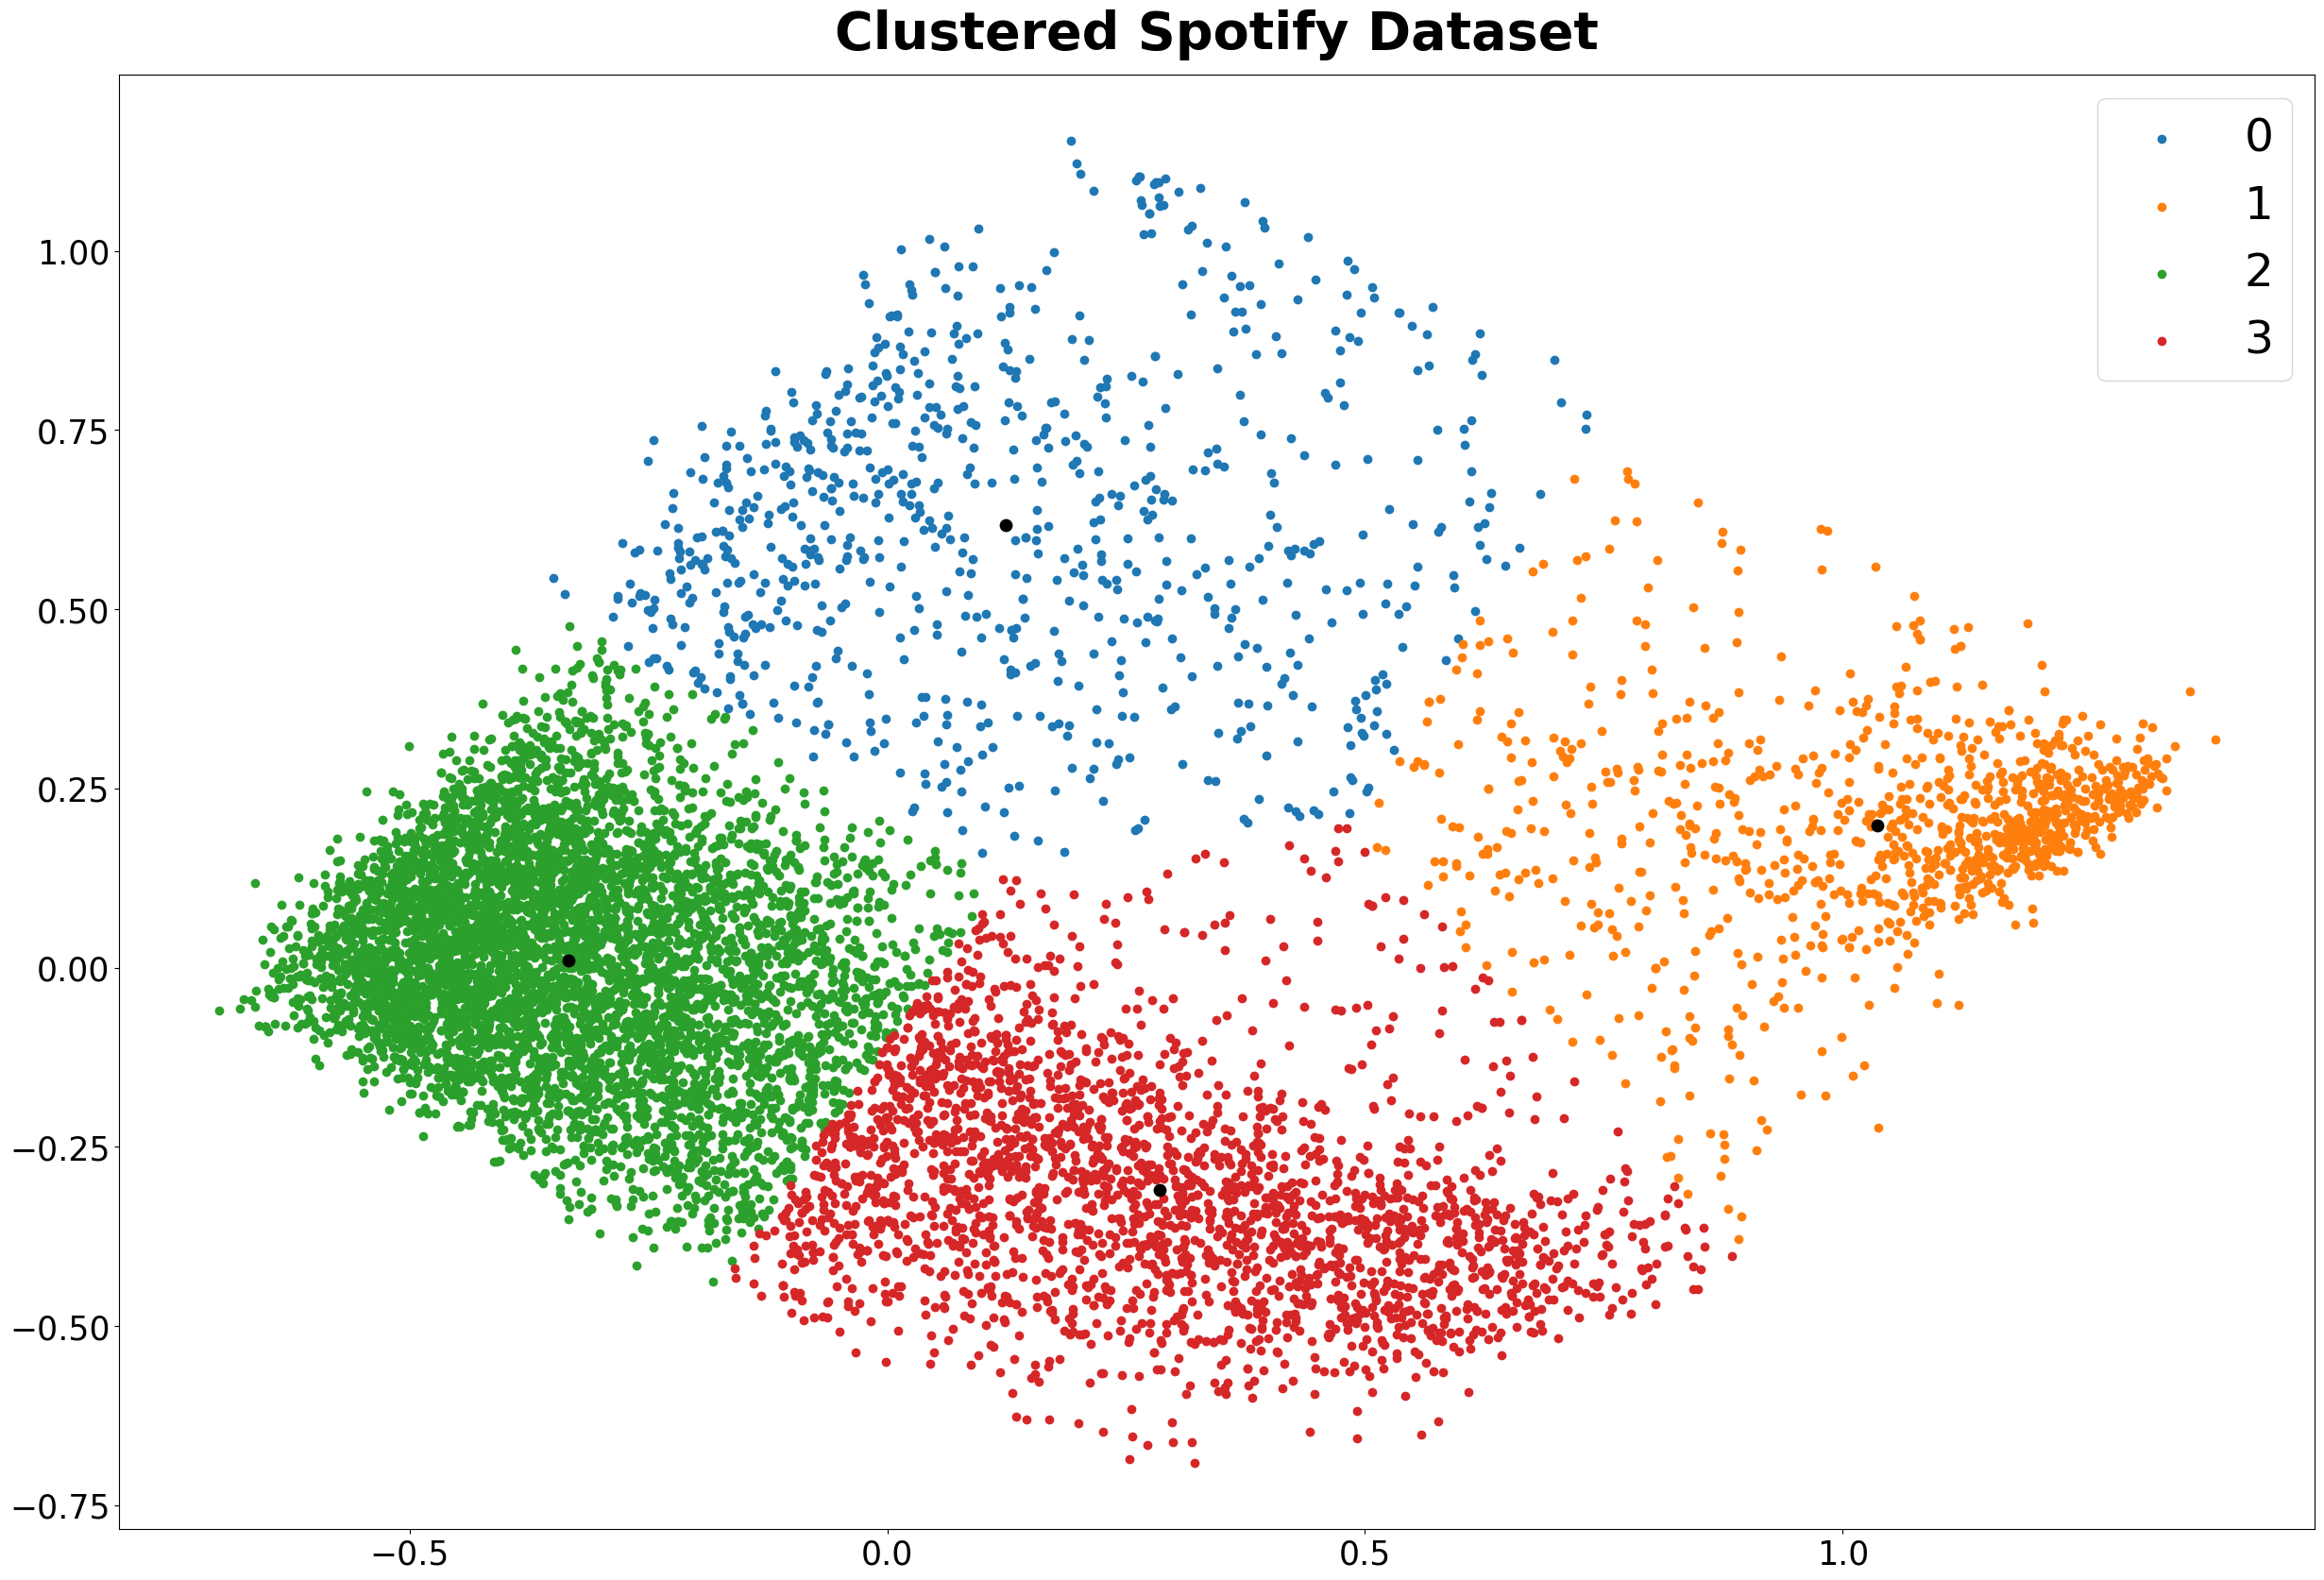

In [297]:
fig = plt.figure(figsize=(30,20))
for i in u_labels:
    plt.scatter(cluster_viz[label == i , 0] , cluster_viz[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend(fontsize=35)
plt.title("Clustered Spotify Dataset",
          fontdict={"fontsize": 40,
                    "fontweight": "bold"},
          pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

### Recommending top k most similar songs with cosine similarity

#### Preparing dataframe with relevant qualities only

In [ ]:
#  initializing a new dataframea
cos_df = spotify_clean_df.copy()

#  URI as index
cos_df = cos_df.set_index("uri")

#  removing unneccesary features from the cluster dataframe
cos_df = cos_df[relevant_qualities]
cos_df.head(5)

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
uri,,,,,,,,
spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.316430,0.399,0.824630,0.472892,0.583000,0.130,0.144144,0.524695
spotify:track:1kNVRCfLtotmIKQOb87tUL,0.852941,0.367,0.847386,0.872490,0.003400,0.114,0.184184,0.458168
spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.444219,0.156,0.683626,0.886546,0.268000,0.105,0.222222,0.355323
spotify:track:3UG4sW8T05V7raSbLA67o8,0.630832,0.730,0.837313,0.018574,0.000426,0.105,0.538539,0.487270
spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.422921,0.123,0.695460,0.996988,0.012500,0.143,0.180180,0.572237


In [ ]:
user_mean = np.array(ave_user_pref).reshape(1,-1)

In [ ]:
cosine_similarity = cosine_similarity(cos_df, user_mean).reshape(cos_df.shape[0])
cosine_similarity = pd.Series(cosine_similarity, index=cos_df.index)
cosine_similarity

uri
spotify:track:3TjoLn6AliBGi3QbwwTxKp    0.898384
spotify:track:1kNVRCfLtotmIKQOb87tUL    0.930844
spotify:track:32QtDJN4oRfo3Jwy6gpoWN    0.874000
spotify:track:3UG4sW8T05V7raSbLA67o8    0.928071
spotify:track:2jPgfwVXOKnUl2QLQsnIAT    0.851094
                                          ...   
spotify:track:4cFfiJCmRfPd9H9p2s5AdT    0.923526
spotify:track:4diUG4YVYzfNL7a3cawE7N    0.937707
spotify:track:1Sv7zdEn0ez8ToEKsPiWWj    0.863866
spotify:track:1K3jYWWhRk5Gg8lVtEgbhK    0.916690
spotify:track:2dgOlplwCj7p3Fv3iaymwf    0.911814
Length: 113947, dtype: float64

In [ ]:
top10_recommendations = cosine_similarity.nlargest(10)
top10_recommendations

uri
spotify:track:574GJ55EBM79W6n2V5bL5z    0.994592
spotify:track:5Ssv6DaKrW0HczVqx6zXdl    0.993700
spotify:track:29bLxLgf01IO0IYMEoWnkM    0.993416
spotify:track:3Jo4tYxjI6opv2K4Zf2wwN    0.993395
spotify:track:1Jl21sidRpEdlVBvYbssLx    0.993234
spotify:track:3ZhTT6yjZwpPph5MIJ53XY    0.993073
spotify:track:2QRoW3drlECOFZLtKFriG8    0.992546
spotify:track:6dU5RxthbuaN31bRbEDlNw    0.992346
spotify:track:52BUOdNI2TneBPq4EFOtAy    0.992326
spotify:track:5dpRJkvY8oWMQmQbEQTXhO    0.992252
dtype: float64

In [ ]:
spotify_clean_df.query("uri == 'spotify:track:1Jl21sidRpEdlVBvYbssLx'")

We can recommend songs in general, then we can try to recommend the artists din!


<h3>Content Based Method </h3>

In [ ]:
# importing additional liibraries
import sympy
from sympy import Matrix, init_printing

from scipy.sparse.linalg import svds,eigs

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances

from time import time

# conda install -c conda-forge scikit-surprise
import surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

init_printing()

In [ ]:
# exporting json file to csv
spotify_clean_df.to_csv("spotify_clean_df.csv")

In [ ]:
data=pd.read_csv('spotify_clean_df.csv', encoding='ISO-8859-1')
data.index = [data["uri"]]

In [ ]:
sample_data = data.sample(n=10000)
sample_data.head()

In [ ]:
data=data[["danceability",
            "energy",
            "loudness",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "liveness",
            "valence",
            "tempo",
            "popularity"]]

In [ ]:
sample_data.index.levels[0].array

In [ ]:
def index_to_instance(df,index=None):
    if index:
        return XYZ(df)[index][1]
    else:
        return XYZ(df)
def XYZ(df):
    return sorted(list(zip(list(df.index.codes[0].data),list(df.index.levels[0].array))))
def value_to_index_map(array):
    array1 = zip(array,range(len(array)))
    return array1

In [ ]:
index_to_instance(sample_data,5)

In [ ]:
class RecSysContentBased():
    def __init__(self):
        pass
    def fit(self,train):
        self.train_set = train
        df1 = cosine_similarity(train)
        self.similarity = df1
        self.distances = pairwise_distances(train,metric='cosine')
    def evaluate(self,user):
        d = sorted(value_to_index_map(self.distances[user]))
        return list(index_to_instance(self.train_set,d[i][1]) for i in range(len(d)))
    def predict(self):
        pass
    def test(self,testset):
        pass

In [ ]:
model = RecSysContentBased()

In [ ]:
model.fit(data)

In [ ]:
index_to_instance(data,10)

In [ ]:
print("Top 5 Songs closest to {0} are: \n{1}".format(index_to_instance(data,10),pd.Series(model.evaluate(10)[1:6])))

In [ ]:
spotify_clean_df.query("uri == 'spotify:track:0cfaNTDBtXDavehtJ554z4' ")

In [ ]:
spotify_clean_df.query("uri == 'spotify:track:0LJXBcmVmXAmbMQf9HdgLw' ")